
🔍 === TESLA DATA QUALITY REPORT ===
Initial Missing Values:
Enriched Data: 24
News Data: 0


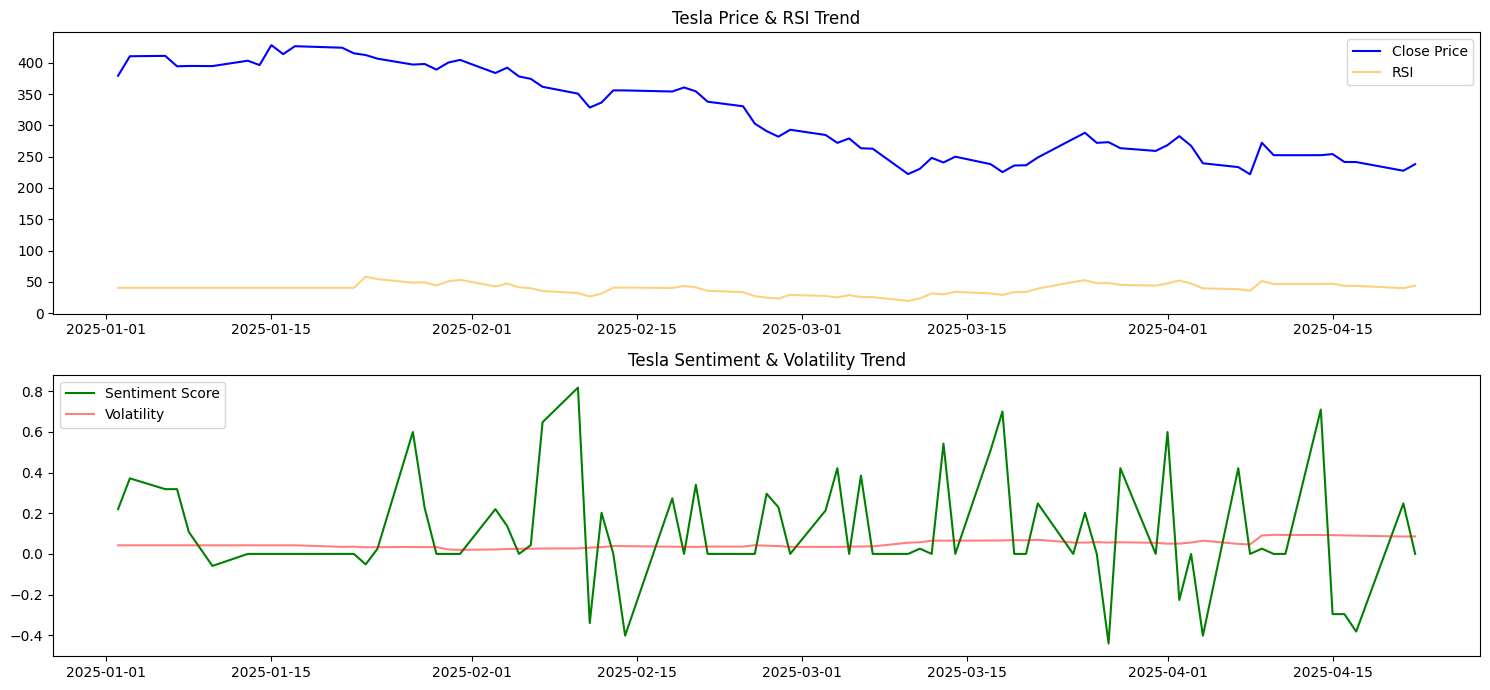


🔍 === NVIDIA DATA QUALITY REPORT ===
Initial Missing Values:
Enriched Data: 24
News Data: 0


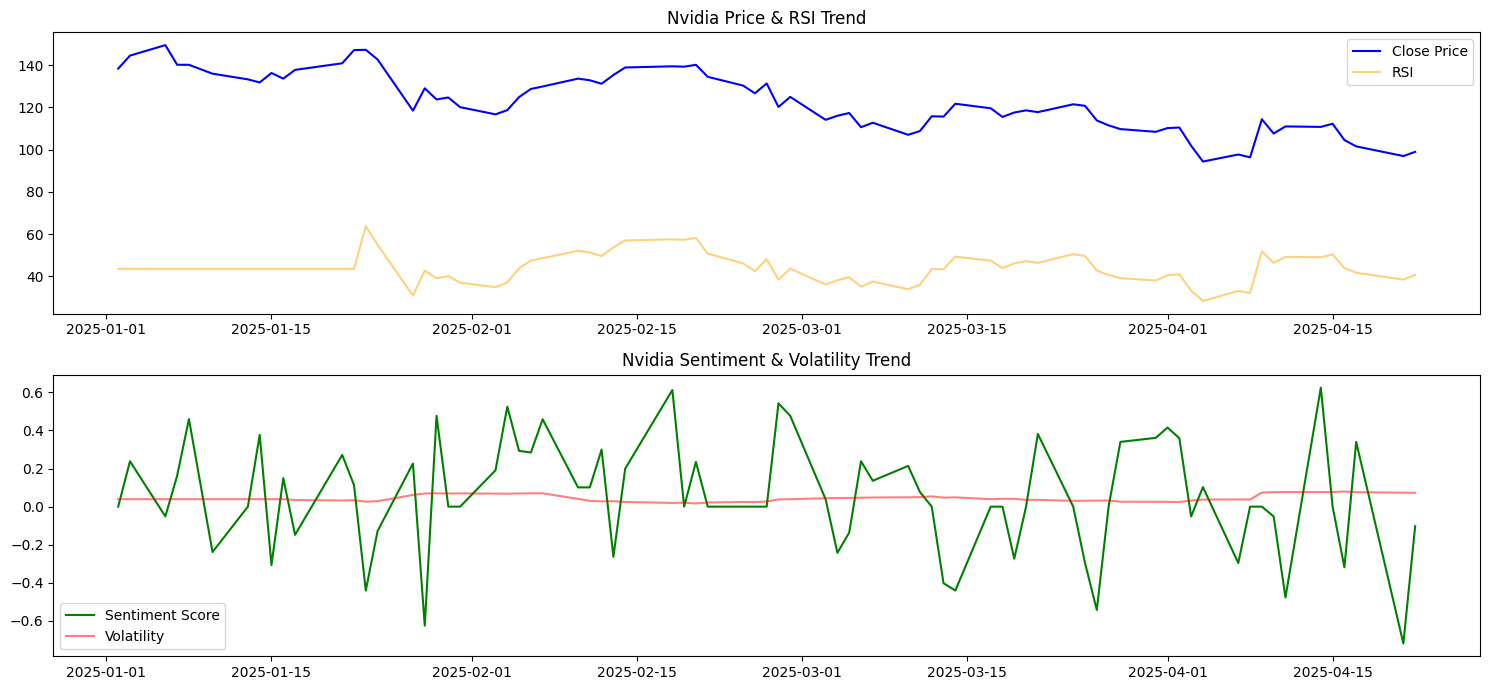


🔍 === AMAZON DATA QUALITY REPORT ===
Initial Missing Values:
Enriched Data: 24
News Data: 0


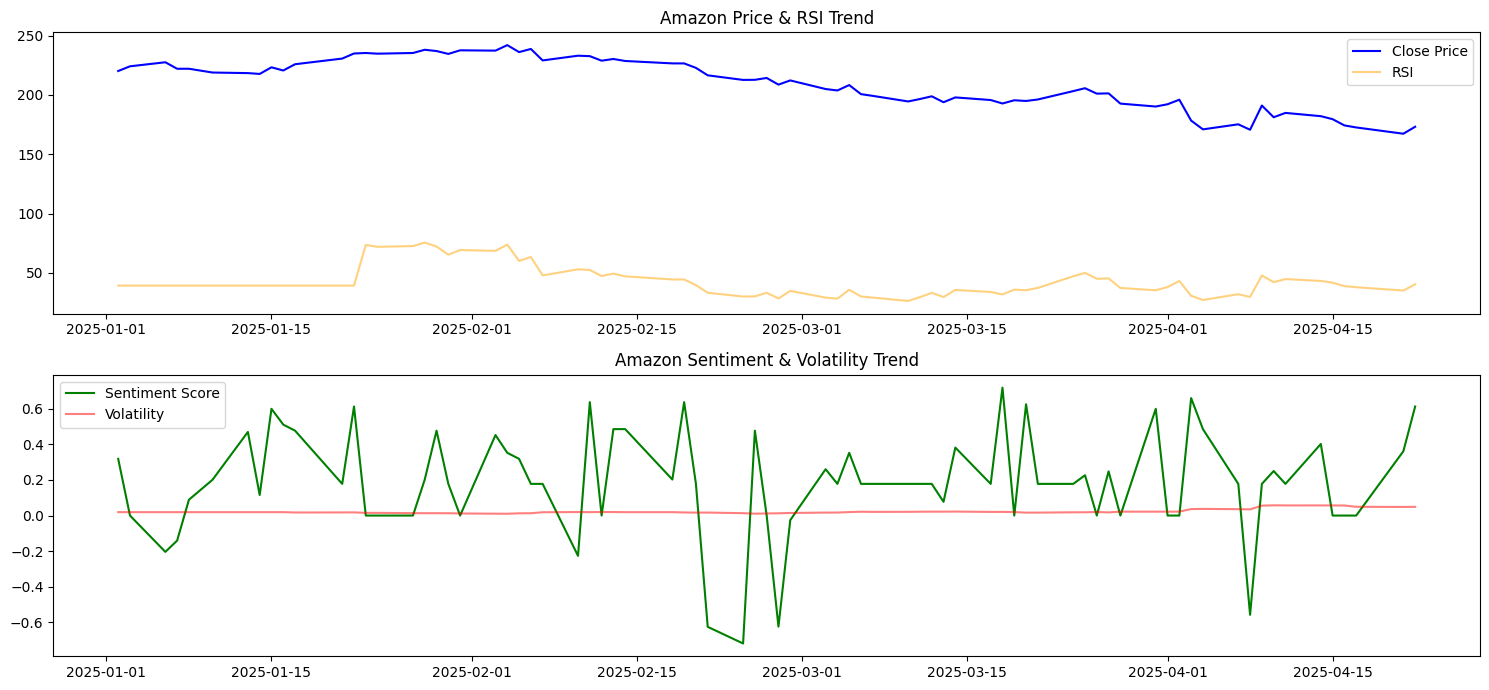


🔍 === GOOGLE DATA QUALITY REPORT ===
Initial Missing Values:
Enriched Data: 24
News Data: 0


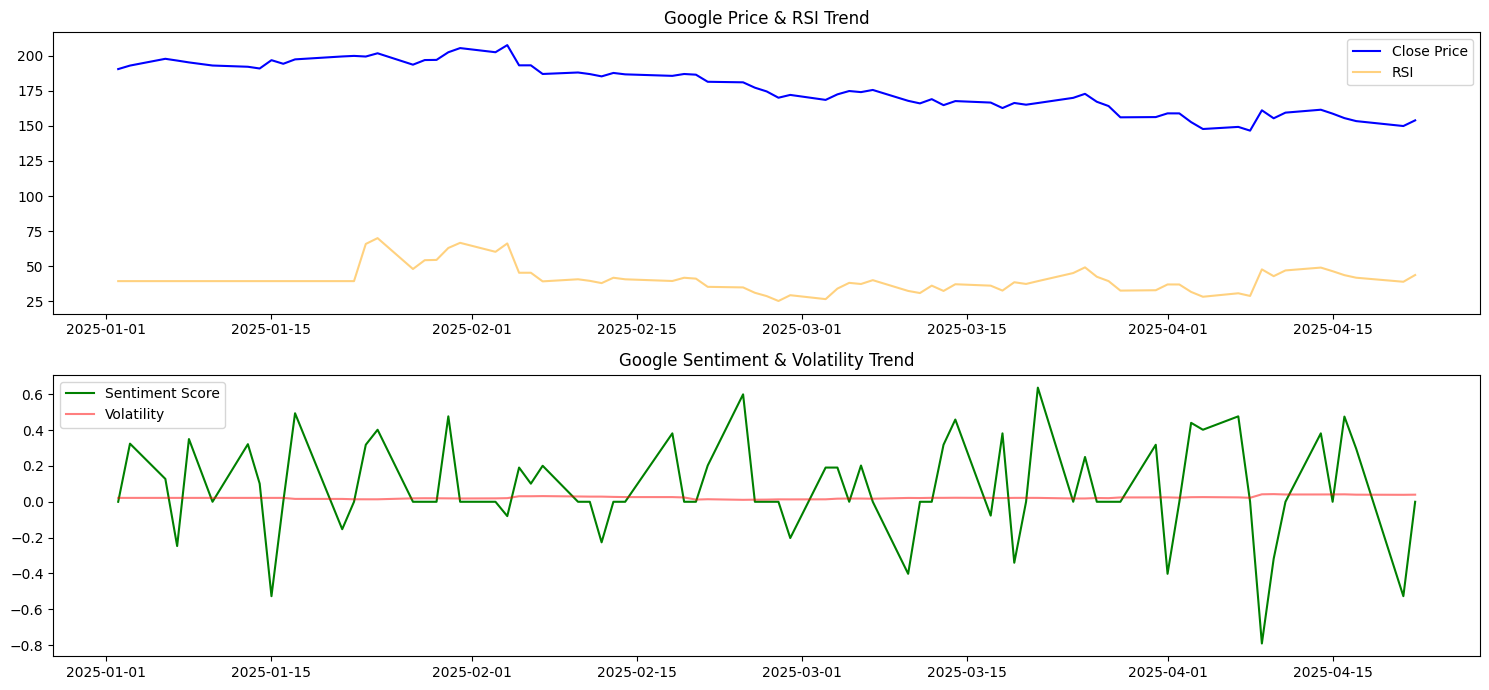


🔍 === MICROSOFT DATA QUALITY REPORT ===
Initial Missing Values:
Enriched Data: 24
News Data: 0


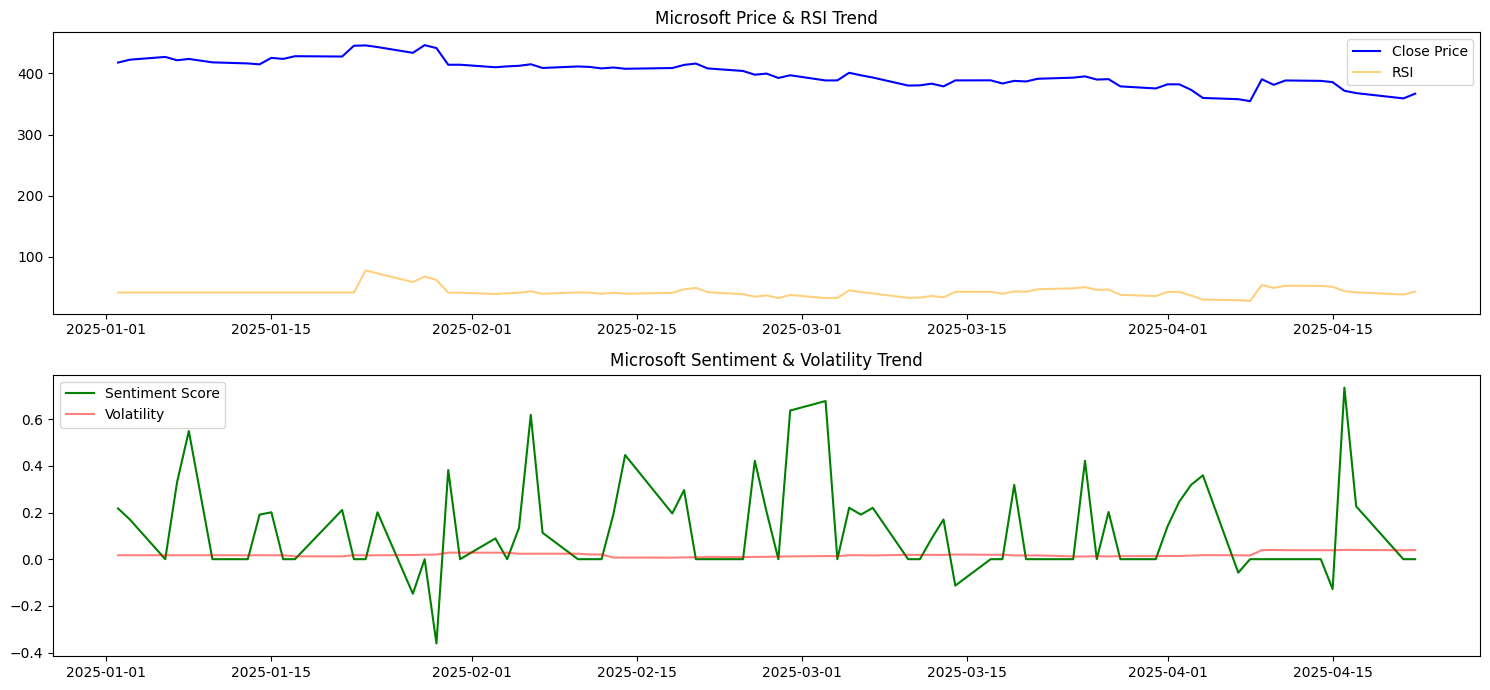

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc


def visualize_results(model, X_test, y_test, company_name, model_name):
    # Confusion Matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix\n{company_name}')
    
    # Feature Importance (for tree-based models)
    if hasattr(model, 'feature_importances_'):
        plt.subplot(1, 3, 2)
        feature_importance = pd.Series(model.feature_importances_, index=X_test.columns)
        feature_importance.nlargest(10).plot(kind='barh')
        plt.title(f'Top 10 Features\n{model_name}')
    
    # ROC Curve
    plt.subplot(1, 3, 3)
    y_prob = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve\n{model_name}')
    plt.legend(loc="lower right")
    
    plt.tight_layout()
    plt.show()

def run_models(enriched_df, news_df, company_name):
    # Date format conversion
    enriched_df['Date'] = pd.to_datetime(enriched_df['Date'])
    news_df['Date'] = pd.to_datetime(news_df['Date'])
    
    # Missing data report
    print(f"\n🔍 === {company_name.upper()} DATA QUALITY REPORT ===")
    print("Initial Missing Values:")
    print("Enriched Data:", enriched_df.isnull().sum().sum())
    print("News Data:", news_df.isnull().sum().sum())
    
    # Price movement label
    enriched_df['price_movement'] = (enriched_df['Close'] > enriched_df['Open']).astype(int)
    
    # Daily sentiment score
    daily_sentiment = news_df.groupby('Date')['sentiment_score'].mean().reset_index()
    daily_sentiment.columns = ['Date', 'daily_sentiment_score']
    
    # Data merge
    merged_df = pd.merge(enriched_df, daily_sentiment, on='Date', how='left')
    
    # Missing sentiment fill
    merged_df['daily_sentiment_score'] = merged_df['daily_sentiment_score'].fillna(0)
    
    # Median fill for numeric columns
    numeric_cols = merged_df.select_dtypes(include=['float64','int64']).columns.drop(['price_movement'])
    merged_df[numeric_cols] = merged_df[numeric_cols].fillna(merged_df[numeric_cols].median())
    
    # Final check
    if merged_df.isnull().any().any():
        print("\n⚠️ Critical Issue: Remaining missing values after processing!")
        print(merged_df.isnull().sum())
        merged_df.dropna(inplace=True)
    
    # Feature and target selection
    X = merged_df.drop(['Date', 'price_movement'], axis=1)
    y = merged_df['price_movement']

    return results, merged_df
    # [Model training and visualization code remains the same...]

def plot_time_series(merged_df, company_name):
    plt.figure(figsize=(15, 7))
    
    # Price and RSI
    plt.subplot(2, 1, 1)
    plt.plot(merged_df['Date'], merged_df['Close'], label='Close Price', color='blue')
    plt.plot(merged_df['Date'], merged_df['RSI'], label='RSI', color='orange', alpha=0.5)
    plt.title(f'{company_name} Price & RSI Trend')
    plt.legend()
    
    # Sentiment and Volatility
    plt.subplot(2, 1, 2)
    plt.plot(merged_df['Date'], merged_df['daily_sentiment_score'], label='Sentiment Score', color='green')
    plt.plot(merged_df['Date'], merged_df['Volatility'], label='Volatility', color='red', alpha=0.5)
    plt.title(f'{company_name} Sentiment & Volatility Trend')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Tesla
tsla_enriched = pd.read_csv('TSLA_2025_enriched.csv')
tsla_news = pd.read_excel('tesla_news_with_sentiment.xlsx')
results_tsla, merged_tsla = run_models(tsla_enriched, tsla_news, "Tesla")
plot_time_series(merged_tsla, "Tesla")

# Nvidia
nvda_enriched = pd.read_csv('NVDA_2025_enriched.csv')
nvda_news = pd.read_excel('nvidia_news_with_sentiment.xlsx')
results_nvda, merged_nvda = run_models(nvda_enriched, nvda_news, "Nvidia")
plot_time_series(merged_nvda, "Nvidia")

# Amazon
amzn_enriched = pd.read_csv('AMZN_2025_enriched.csv')
amzn_news = pd.read_excel('amazon_news_with_sentiment.xlsx')
results_amzn, merged_amzn = run_models(amzn_enriched, amzn_news, "Amazon")
plot_time_series(merged_amzn, "Amazon")

# Google
goog_enriched = pd.read_csv('GOOG_2025_enriched.csv')
goog_news = pd.read_excel('google_news_with_sentiment.xlsx')
results_goog, merged_goog = run_models(goog_enriched, goog_news, "Google")
plot_time_series(merged_goog, "Google")

# Microsoft
msft_enriched = pd.read_csv('MSFT_2025_enriched.csv')
msft_news = pd.read_excel('microsoft_news_with_sentiment.xlsx')
results_msft, merged_msft = run_models(msft_enriched, msft_news, "Microsoft")
plot_time_series(merged_msft, "Microsoft")



Starting Analysis for Tesla...

🔹 Logistic Regression Performance:
Accuracy: 86.67%
              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.86      0.86      0.86         7

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15


🔹 Random Forest Performance:
Accuracy: 73.33%
              precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.80      0.57      0.67         7

    accuracy                           0.73        15
   macro avg       0.75      0.72      0.72        15
weighted avg       0.75      0.73      0.73        15


🔹 XGBoost Performance:
Accuracy: 80.00%
              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.83      0.71      0.77         7

    accur

<Figure size 1200x600 with 0 Axes>

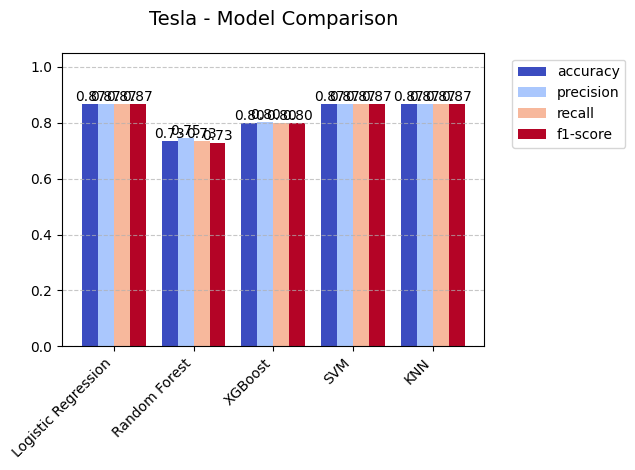

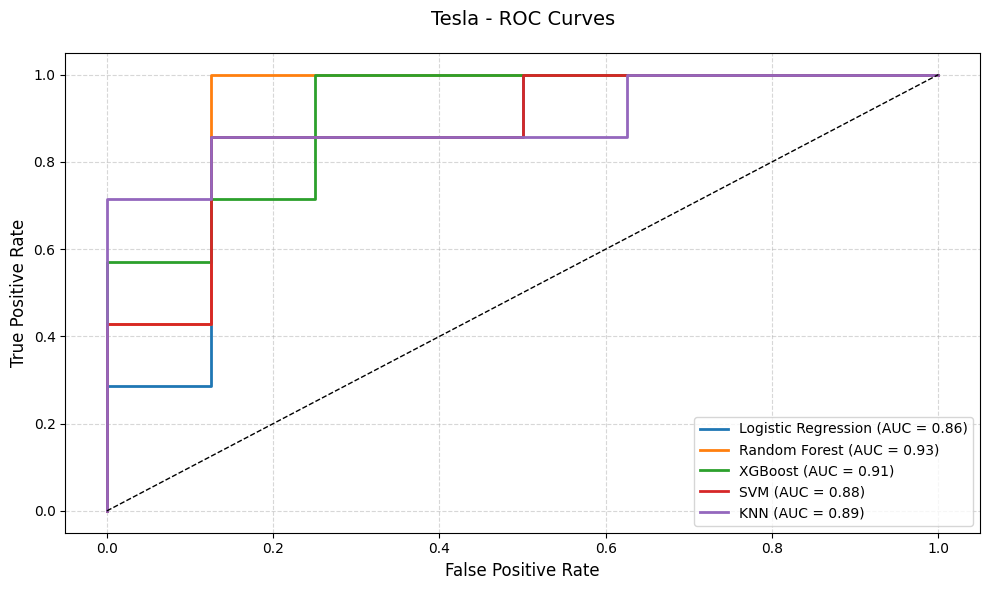

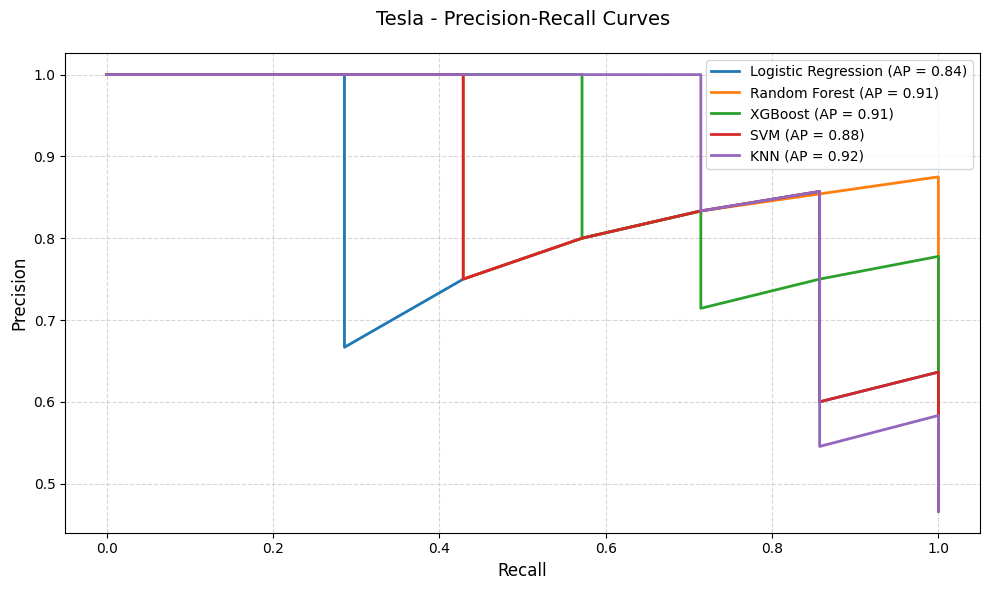

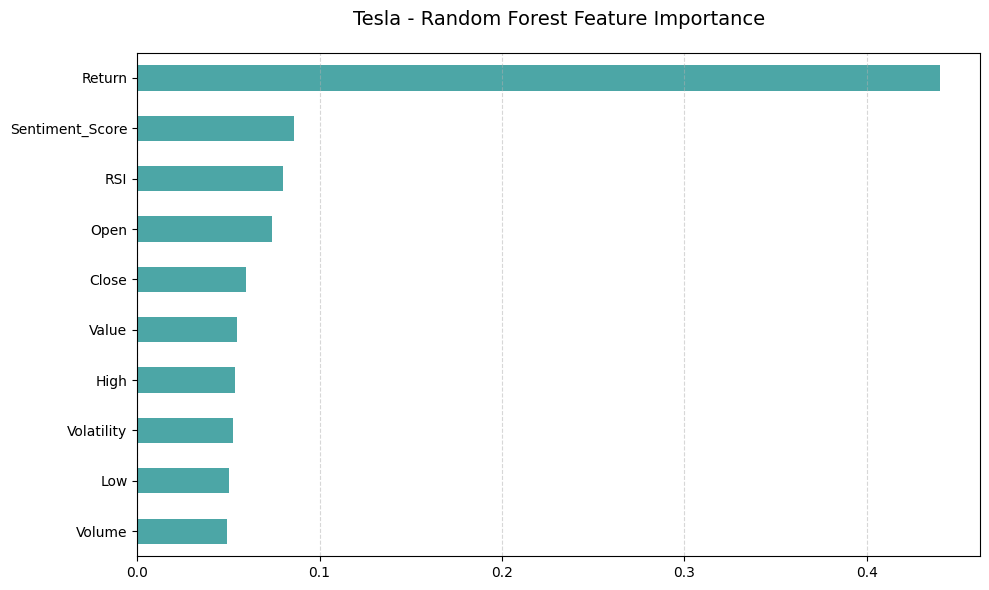


Starting Analysis for Amazon...

🔹 Logistic Regression Performance:
Accuracy: 73.33%
              precision    recall  f1-score   support

           0       0.80      0.57      0.67         7
           1       0.70      0.88      0.78         8

    accuracy                           0.73        15
   macro avg       0.75      0.72      0.72        15
weighted avg       0.75      0.73      0.73        15


🔹 Random Forest Performance:
Accuracy: 86.67%
              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.88      0.88      0.88         8

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15


🔹 XGBoost Performance:
Accuracy: 86.67%
              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.88      0.88      0.88         8

    accu

<Figure size 1200x600 with 0 Axes>

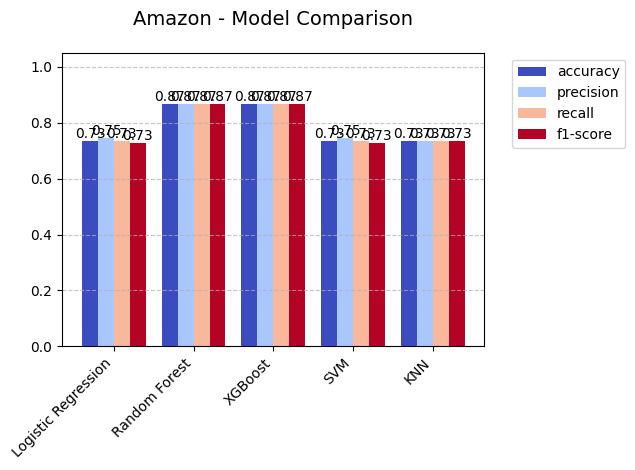

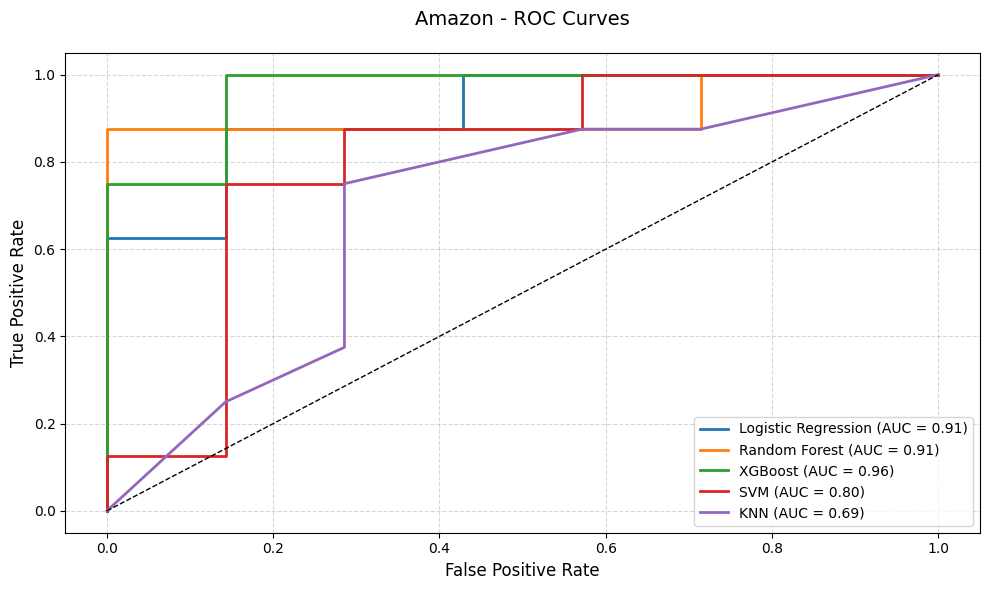

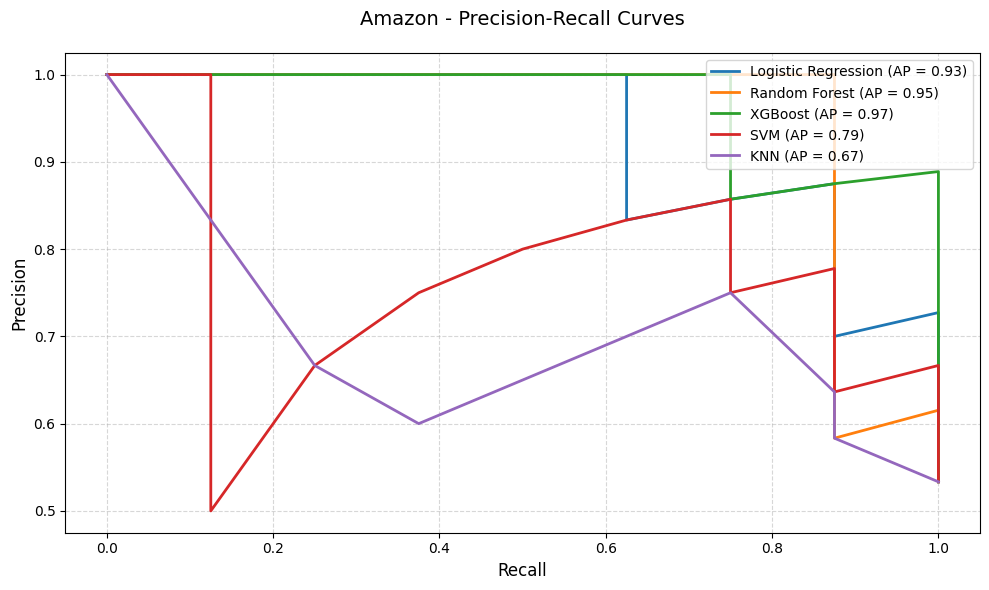

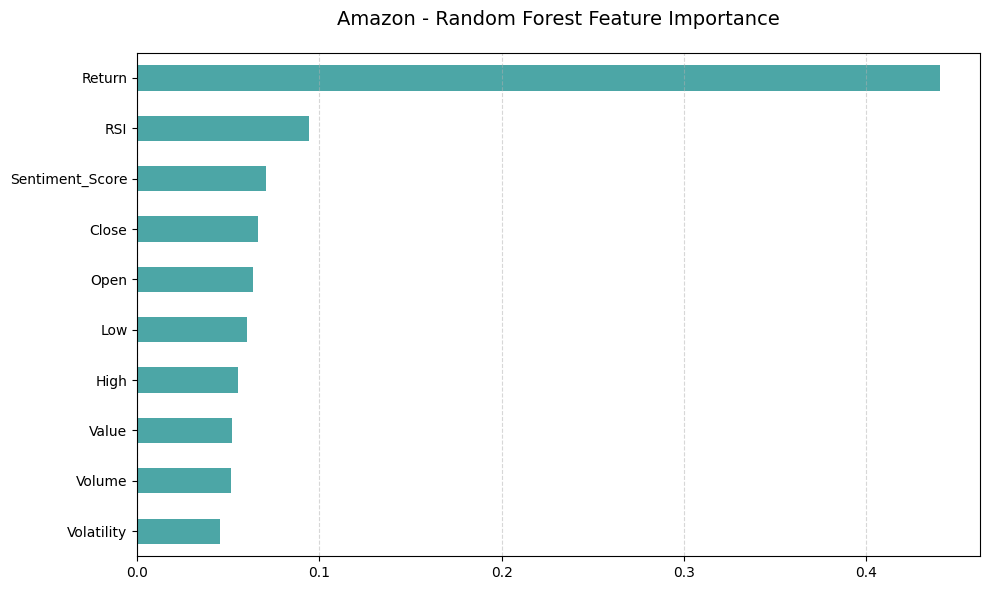


Starting Analysis for Google...

🔹 Logistic Regression Performance:
Accuracy: 80.00%
              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.86      0.75      0.80         8

    accuracy                           0.80        15
   macro avg       0.80      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15


🔹 Random Forest Performance:
Accuracy: 80.00%
              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.86      0.75      0.80         8

    accuracy                           0.80        15
   macro avg       0.80      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15


🔹 XGBoost Performance:
Accuracy: 80.00%
              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.86      0.75      0.80         8

    accu

<Figure size 1200x600 with 0 Axes>

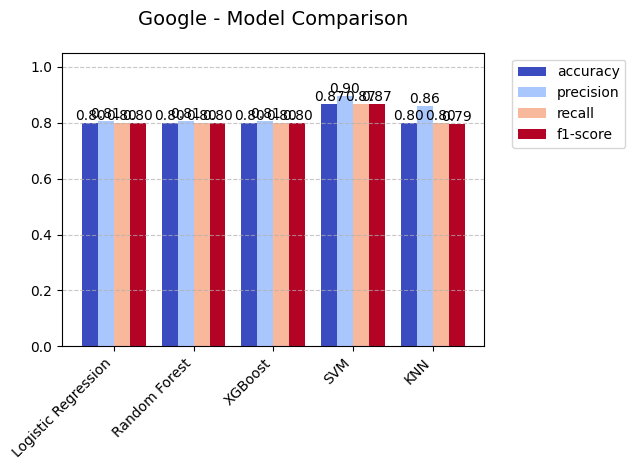

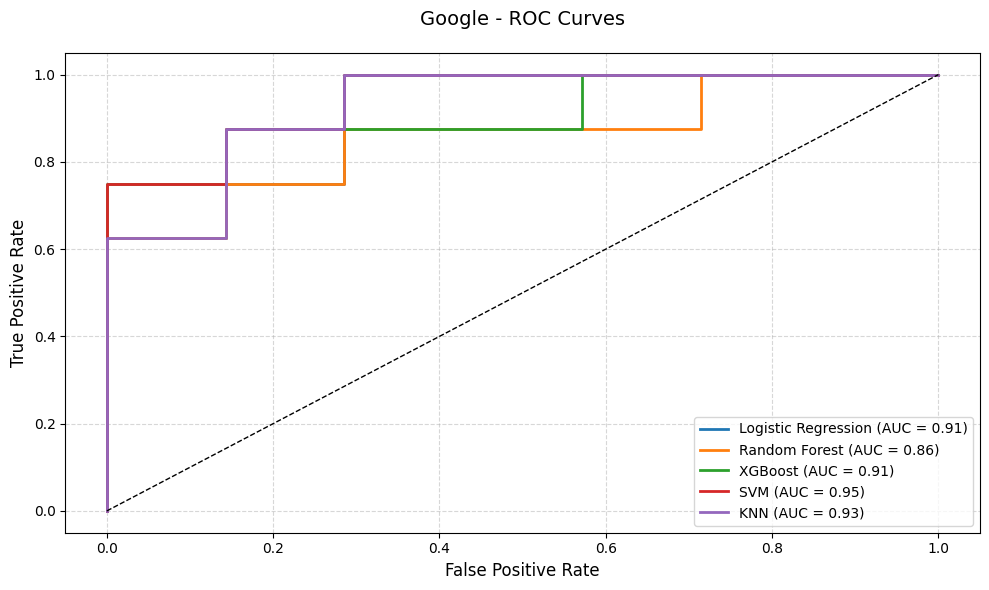

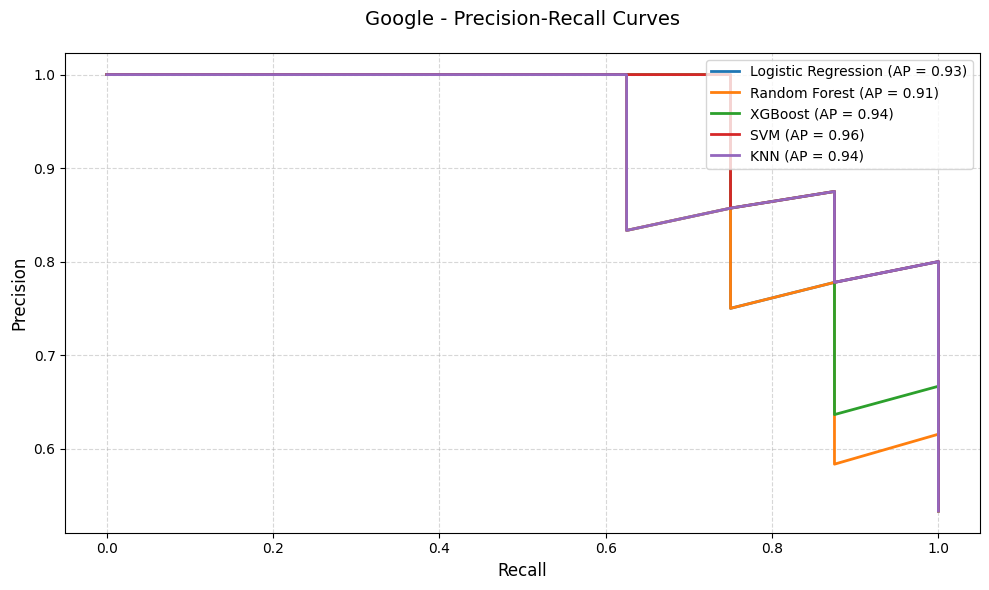

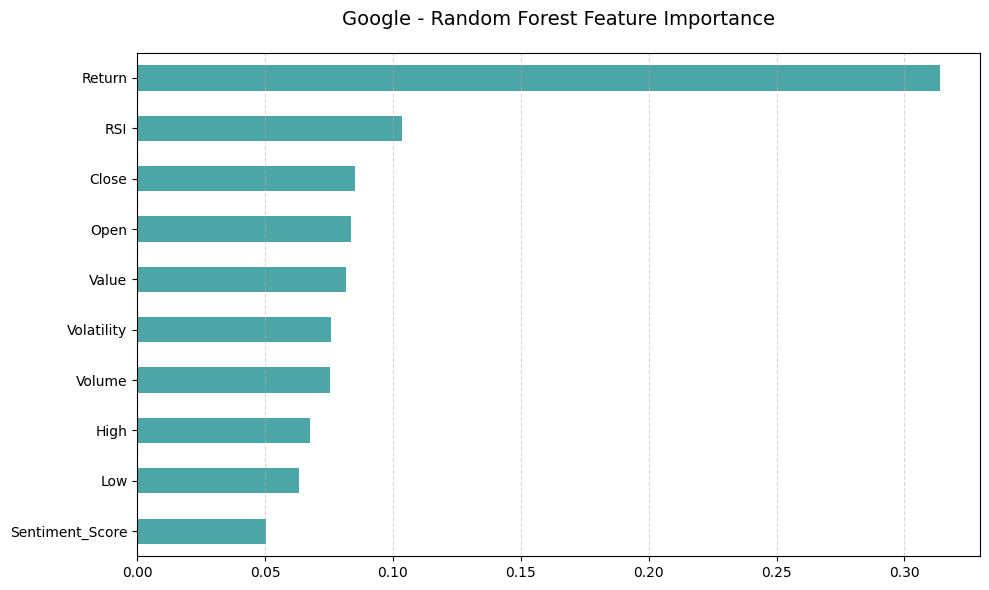


Starting Analysis for Microsoft...

🔹 Logistic Regression Performance:
Accuracy: 66.67%
              precision    recall  f1-score   support

           0       0.62      0.71      0.67         7
           1       0.71      0.62      0.67         8

    accuracy                           0.67        15
   macro avg       0.67      0.67      0.67        15
weighted avg       0.67      0.67      0.67        15


🔹 Random Forest Performance:
Accuracy: 80.00%
              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.86      0.75      0.80         8

    accuracy                           0.80        15
   macro avg       0.80      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15


🔹 XGBoost Performance:
Accuracy: 80.00%
              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.86      0.75      0.80         8

    a

<Figure size 1200x600 with 0 Axes>

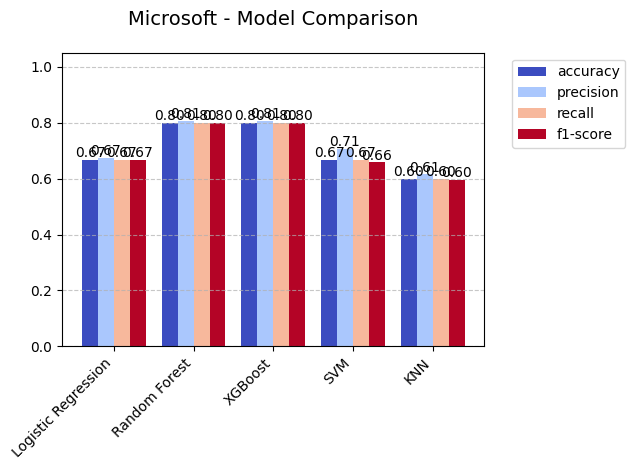

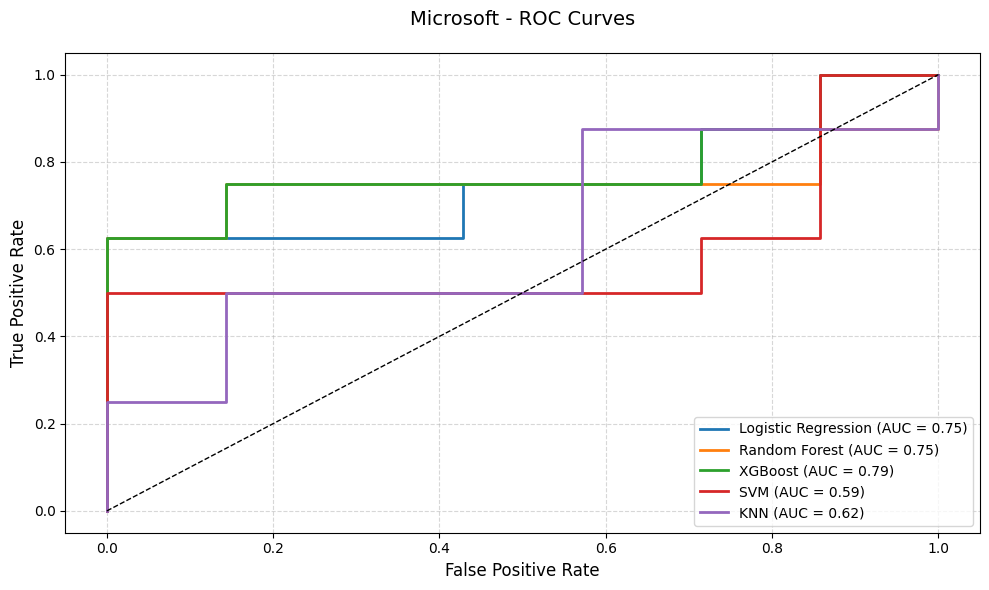

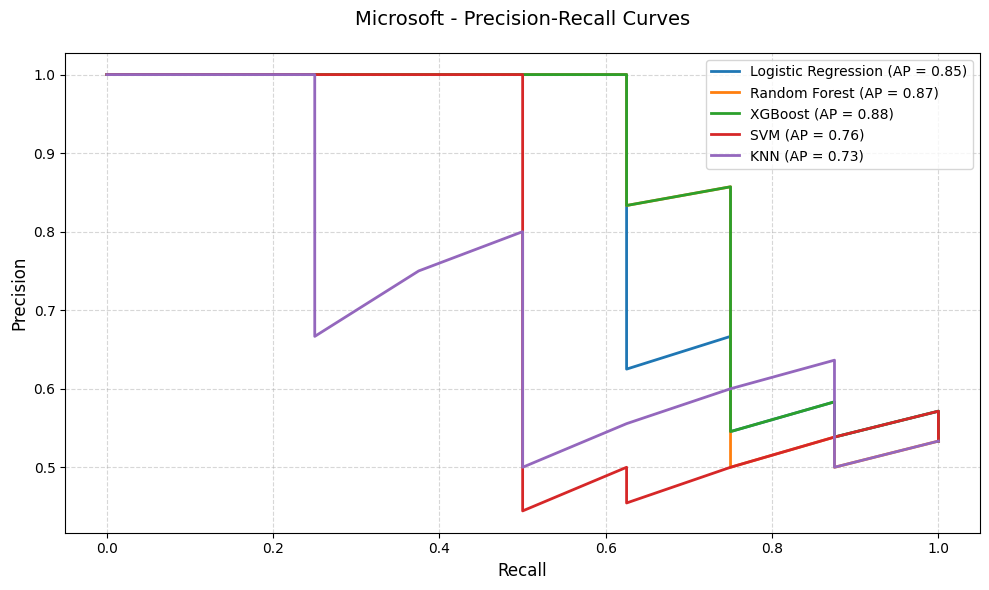

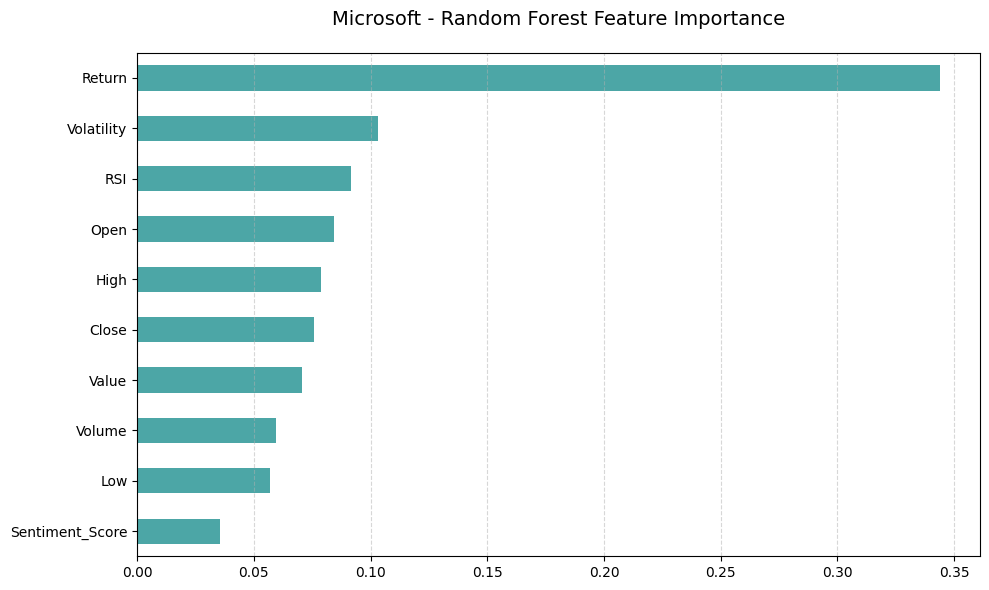


Starting Analysis for Nvidia...

🔹 Logistic Regression Performance:
Accuracy: 80.00%
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.75      1.00      0.86         9

    accuracy                           0.80        15
   macro avg       0.88      0.75      0.76        15
weighted avg       0.85      0.80      0.78        15


🔹 Random Forest Performance:
Accuracy: 86.67%
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.82      1.00      0.90         9

    accuracy                           0.87        15
   macro avg       0.91      0.83      0.85        15
weighted avg       0.89      0.87      0.86        15


🔹 XGBoost Performance:
Accuracy: 80.00%
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.75      1.00      0.86         9

    accu

<Figure size 1200x600 with 0 Axes>

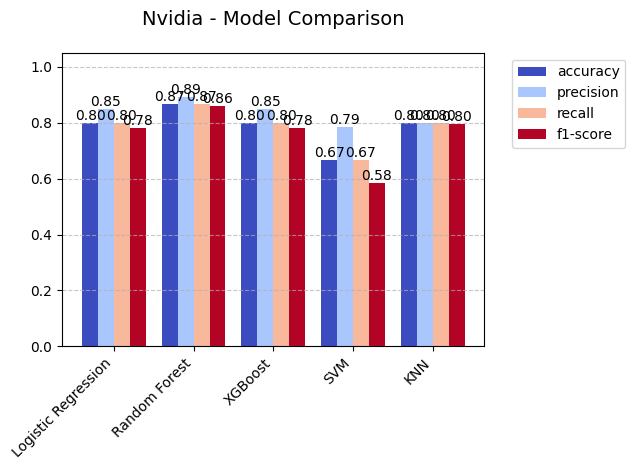

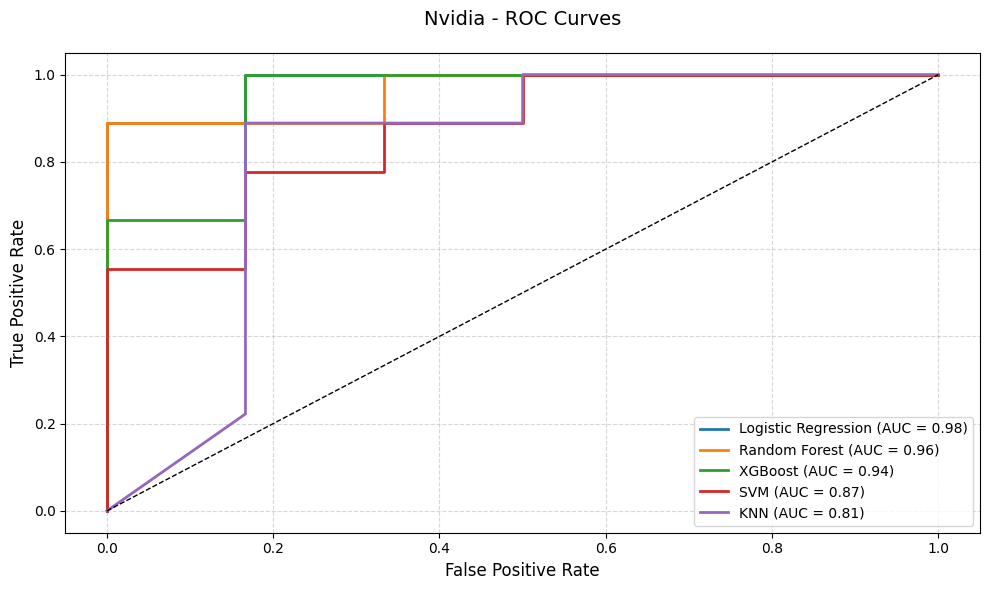

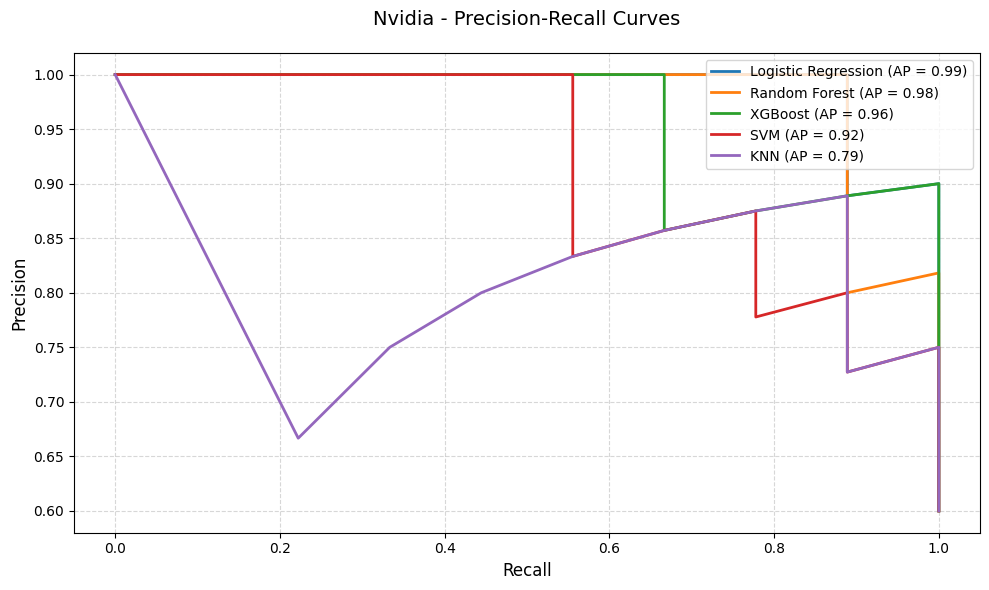

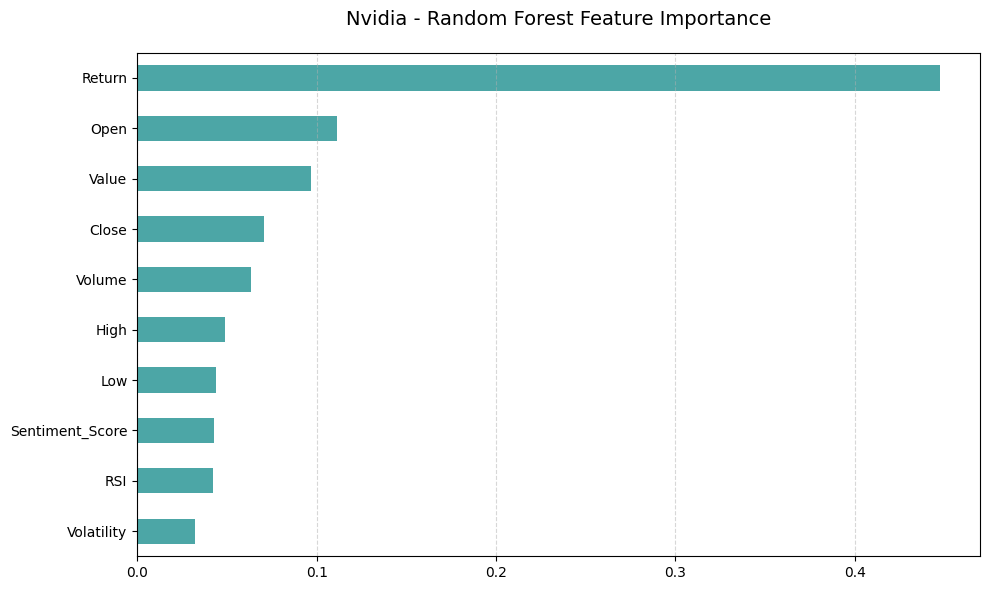

In [8]:
# -*- coding: utf-8 -*-
"""
AI Investment News Impact Analysis - Complete Pipeline
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, auc, precision_recall_curve, average_precision_score
)
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Data Loading and Preprocessing
def load_and_preprocess(stock_file, news_file):
    """Loads and merges stock and news data."""
    try:
        stock_df = pd.read_csv(
            stock_file,
            parse_dates=['Date'],
            dtype={
                'Open': float, 'High': float, 'Low': float,
                'Close': float, 'Volume': float,
                'Volatility': float, 'RSI': float
            }
        )
        
        news_df = pd.read_excel(
            news_file,
            parse_dates=['Date'],
            usecols=['Date', 'sentiment_score']
        )
        
        daily_sentiment = news_df.groupby('Date')['sentiment_score'].mean().reset_index()
        daily_sentiment.columns = ['Date', 'Sentiment_Score']
        
        merged_df = pd.merge(
            stock_df,
            daily_sentiment,
            on='Date',
            how='left',
            validate='one_to_one'
        )
        
        numeric_cols = merged_df.select_dtypes(include=np.number).columns
        for col in numeric_cols:
            merged_df[col] = merged_df[col].fillna(merged_df[col].median())
        
        merged_df['Price_Up'] = (merged_df['Close'] > merged_df['Open']).astype(int)
        
        if merged_df.isnull().sum().sum() > 0:
            merged_df.dropna(inplace=True)
            
        return merged_df
    
    except Exception as e:
        print(f"Error occurred: {str(e)}")
        return None

# Model Training and Evaluation
def run_analysis(data, company):
    """Runs all models and compares their performance."""
    features = data.drop(['Date', 'Price_Up'], axis=1)
    target = data['Price_Up']
    
    X_train, X_test, y_train, y_test = train_test_split(
        features, target, test_size=0.2, random_state=42, stratify=target
    )
    
    smote = SMOTE()
    X_res, y_res = smote.fit_resample(X_train, y_train)
    
    models = {
        'Logistic Regression': Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler()),
            ('model', LogisticRegression())
        ]),
        'Random Forest': Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('model', RandomForestClassifier())
        ]),
        'XGBoost': Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('model', XGBClassifier(eval_metric='logloss'))
        ]),
        'SVM': Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', RobustScaler()),
            ('model', SVC(probability=True))
        ]),
        'KNN': Pipeline([
            ('imputer', KNNImputer(n_neighbors=5)),
            ('scaler', RobustScaler()),
            ('model', GridSearchCV(
                KNeighborsClassifier(),
                param_grid={
                    'n_neighbors': range(3, 20, 2),
                    'weights': ['uniform', 'distance'],
                    'p': [1, 2]
                },
                cv=5,
                scoring='f1_weighted'
            ))
        ])
    }
    
    results = {}
    
    for name, model in models.items():
        try:
            model.fit(X_res, y_res)
            y_pred = model.predict(X_test)
            
            if hasattr(model, "predict_proba"):
                y_proba = model.predict_proba(X_test)[:,1]
            else:
                y_proba = model.decision_function(X_test)
            
            results[name] = {
                'model': model,
                'accuracy': accuracy_score(y_test, y_pred),
                'classification_report': classification_report(y_test, y_pred, output_dict=True),
                'confusion_matrix': confusion_matrix(y_test, y_pred),
                'roc_auc': roc_curve(y_test, y_proba),
                'pr_curve': precision_recall_curve(y_test, y_proba),
                'average_precision': average_precision_score(y_test, y_proba)
            }
            
            print(f"\n🔹 {name} Performance:")
            print(f"Accuracy: {results[name]['accuracy']:.2%}")
            print(classification_report(y_test, y_pred))
            
        except Exception as e:
            print(f"Error in {name}: {str(e)}")
    
    return results, features.columns

def visualize_results(results, company, feature_names):
    """Visualizes the results with multiple plots."""
    
    # 1. Model Comparison Bar Chart
    plt.figure(figsize=(12, 6))
    metrics = ['accuracy', 'precision', 'recall', 'f1-score']
    scores = []
    for model in results:
        report = results[model]['classification_report']
        scores.append([
            results[model]['accuracy'],
            report['weighted avg']['precision'],
            report['weighted avg']['recall'],
            report['weighted avg']['f1-score']
        ])
    
    metrics_df = pd.DataFrame(scores, index=results.keys(), columns=metrics)
    ax = metrics_df.plot(kind='bar', width=0.8, colormap='coolwarm')
    plt.title(f'{company} - Model Comparison', fontsize=14, pad=20)
    plt.ylim(0, 1.05)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2f}", 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   xytext=(0, 5), 
                   textcoords='offset points')
    
    plt.tight_layout()
    plt.show()
    
    # 2. ROC Curves
    plt.figure(figsize=(10, 6))
    for model in results:
        fpr, tpr, _ = results[model]['roc_auc']
        plt.plot(fpr, tpr, lw=2, label=f'{model} (AUC = {auc(fpr, tpr):.2f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title(f'{company} - ROC Curves', fontsize=14, pad=20)
    plt.legend(loc='lower right')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
    
    # 3. Precision-Recall Curves
    plt.figure(figsize=(10, 6))
    for model in results:
        precision, recall, _ = results[model]['pr_curve']
        plt.plot(recall, precision, lw=2, 
                label=f'{model} (AP = {results[model]["average_precision"]:.2f})')
    plt.xlabel('Recall', fontsize=12)
    plt.ylabel('Precision', fontsize=12)
    plt.title(f'{company} - Precision-Recall Curves', fontsize=14, pad=20)
    plt.legend(loc='upper right')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
    
    # 4. Feature Importance (Random Forest only)
    if 'Random Forest' in results:
        try:
            plt.figure(figsize=(10, 6))
            rf_model = results['Random Forest']['model'].named_steps['model']
            feature_importance = pd.Series(rf_model.feature_importances_, index=feature_names)
            feature_importance.nlargest(10).sort_values().plot(
                kind='barh', color='teal', alpha=0.7)
            plt.title(f'{company} - Random Forest Feature Importance', fontsize=14, pad=20)
            plt.grid(True, axis='x', linestyle='--', alpha=0.5)
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"Feature importance plot failed: {str(e)}")

# Main Execution
if __name__ == "__main__":
    companies = {
        'Tesla': ('TSLA_2025_enriched.csv', 'tesla_news_with_sentiment.xlsx'),
        'Amazon': ('AMZN_2025_enriched.csv', 'amazon_news_with_sentiment.xlsx'),
        'Google': ('GOOG_2025_enriched.csv', 'google_news_with_sentiment.xlsx'),
        'Microsoft': ('MSFT_2025_enriched.csv', 'microsoft_news_with_sentiment.xlsx'),
        'Nvidia': ('NVDA_2025_enriched.csv', 'nvidia_news_with_sentiment.xlsx')
    }
    
    for company, files in companies.items():
        print(f"\n{'='*40}\nStarting Analysis for {company}...\n{'='*40}")
        
        df = load_and_preprocess(files[0], files[1])
        if df is None:
            continue
            
        results, feature_names = run_analysis(df, company)
        visualize_results(results, company, feature_names)



Tesla Analysis Starting...

🔹 Training Decision Tree...

🔹 Training Random Forest...

🔹 Training XGBoost...

⭐ Decision Tree Performance (Tesla):
Accuracy: 73.33%
              precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.80      0.57      0.67         7

    accuracy                           0.73        15
   macro avg       0.75      0.72      0.72        15
weighted avg       0.75      0.73      0.73        15



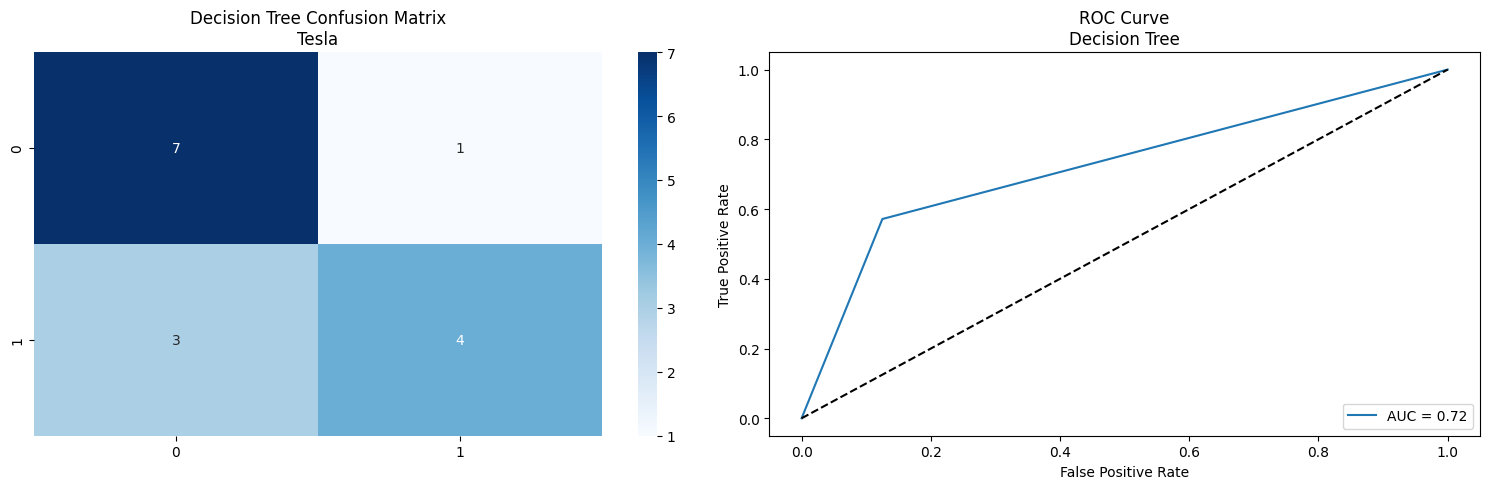

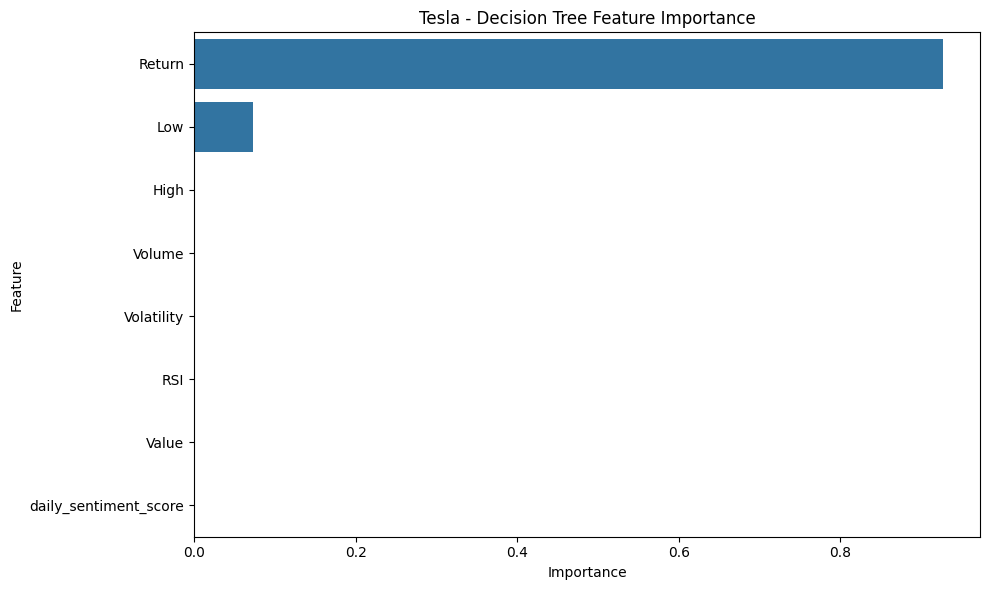

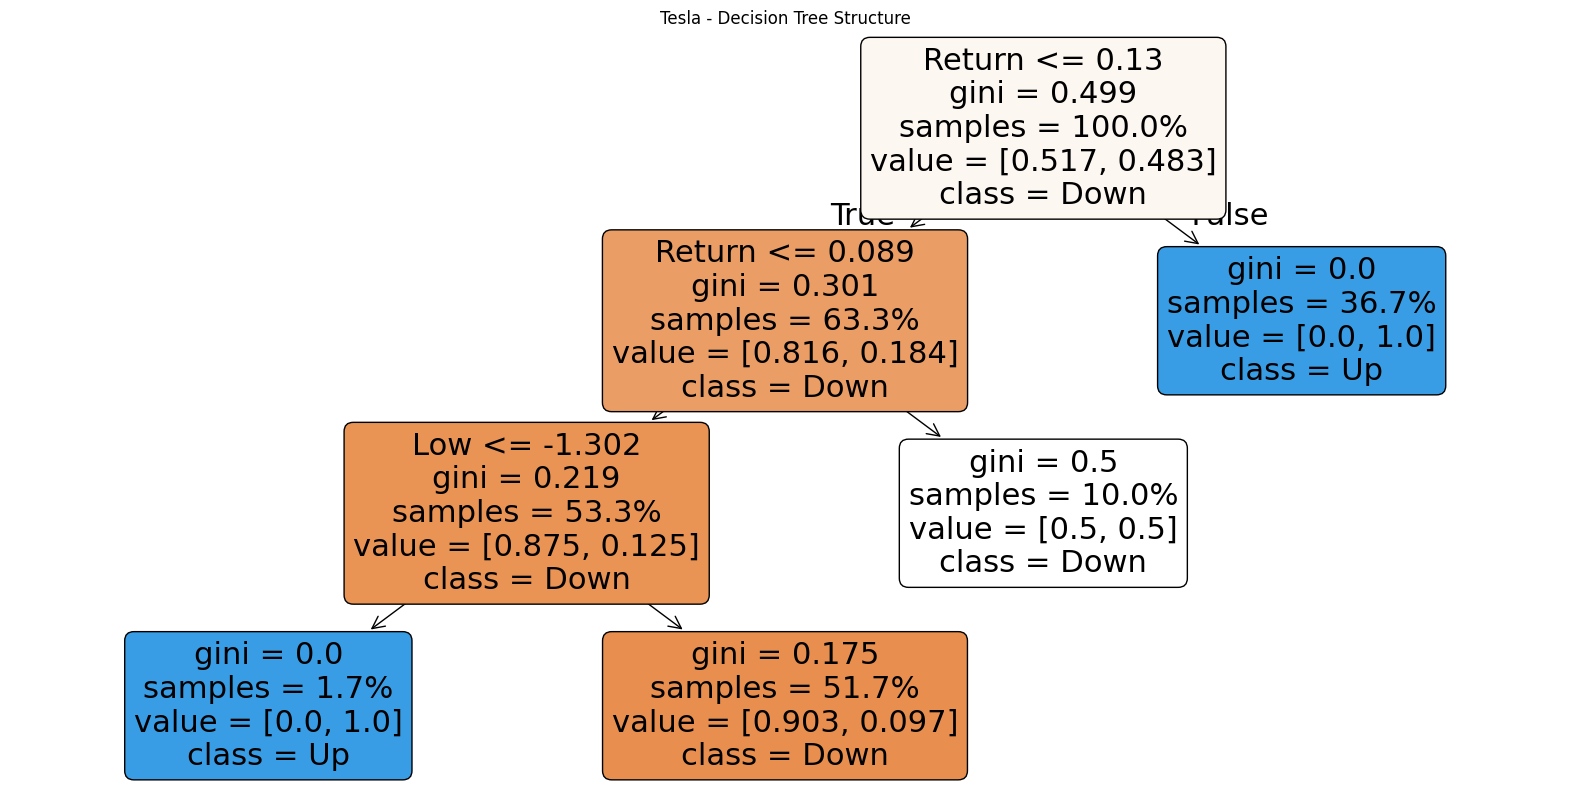


⭐ Random Forest Performance (Tesla):
Accuracy: 73.33%
              precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.80      0.57      0.67         7

    accuracy                           0.73        15
   macro avg       0.75      0.72      0.72        15
weighted avg       0.75      0.73      0.73        15



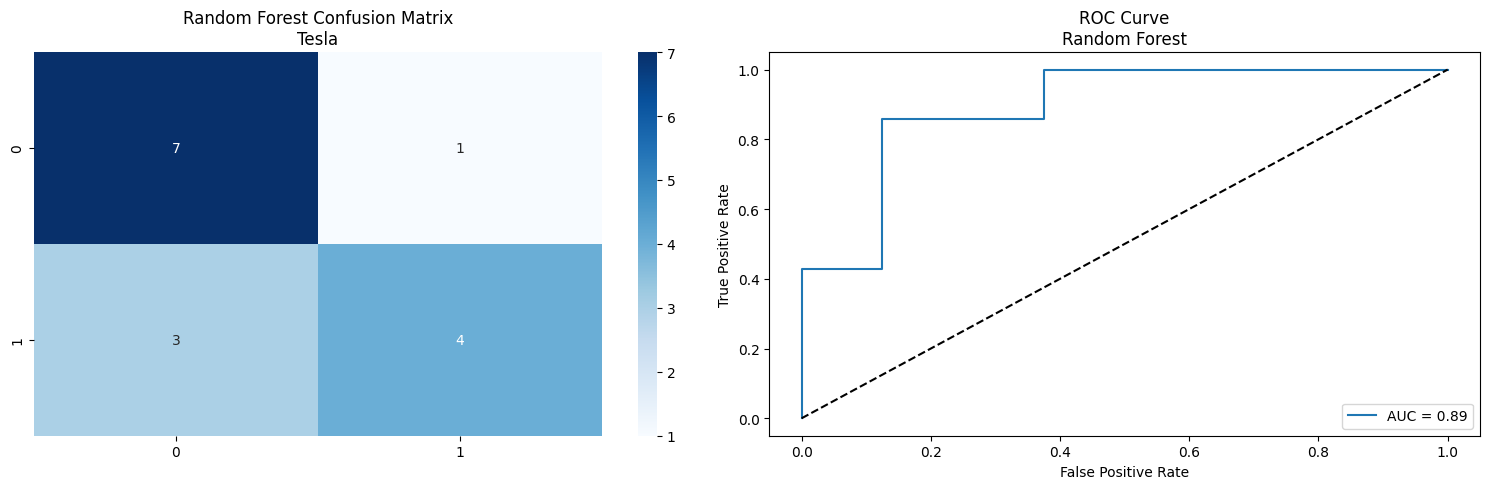

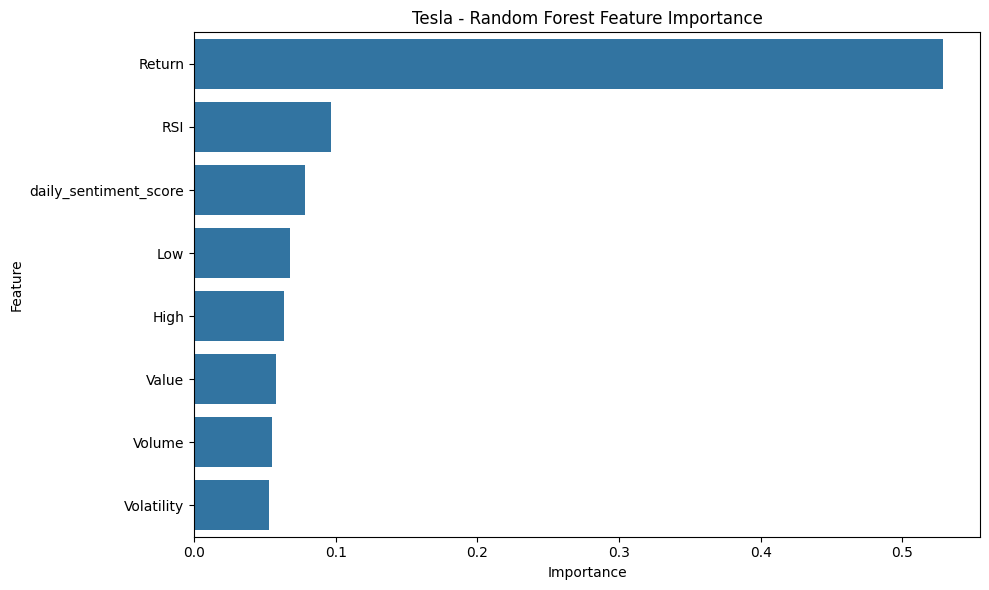


⭐ XGBoost Performance (Tesla):
Accuracy: 80.00%
              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.83      0.71      0.77         7

    accuracy                           0.80        15
   macro avg       0.81      0.79      0.80        15
weighted avg       0.80      0.80      0.80        15



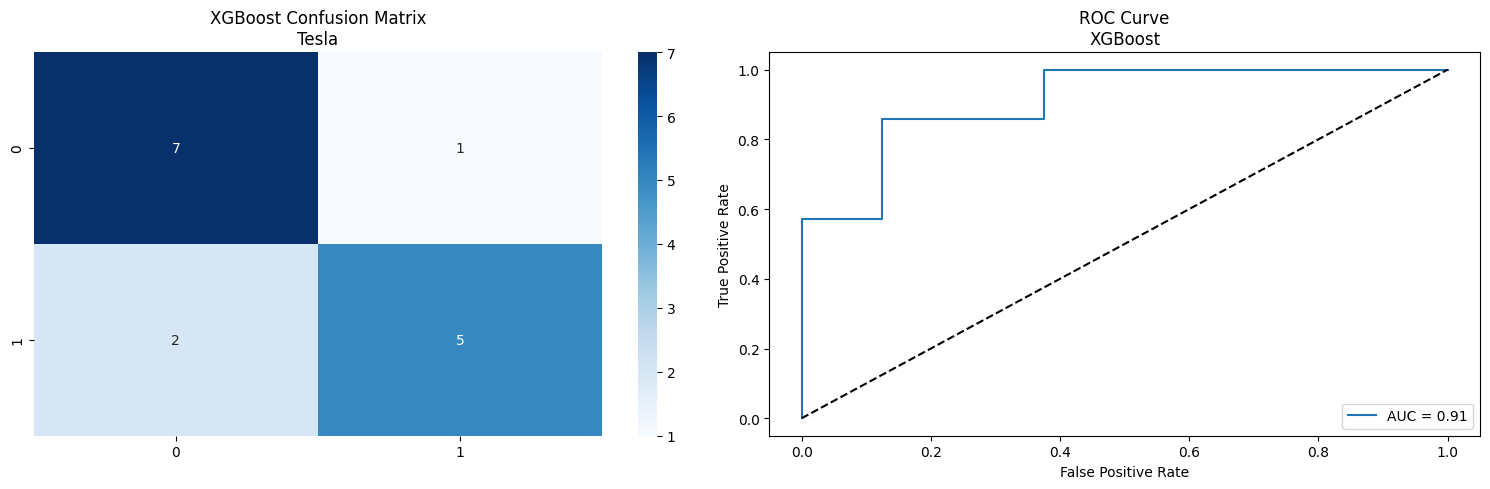

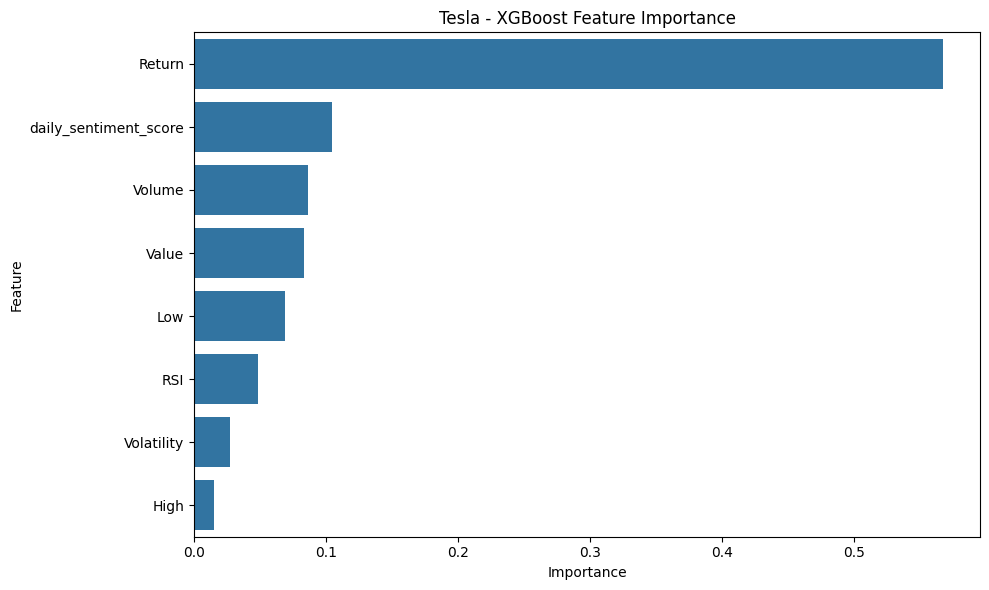


Amazon Analysis Starting...

🔹 Training Decision Tree...

🔹 Training Random Forest...

🔹 Training XGBoost...

⭐ Decision Tree Performance (Amazon):
Accuracy: 80.00%
              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.86      0.75      0.80         8

    accuracy                           0.80        15
   macro avg       0.80      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15



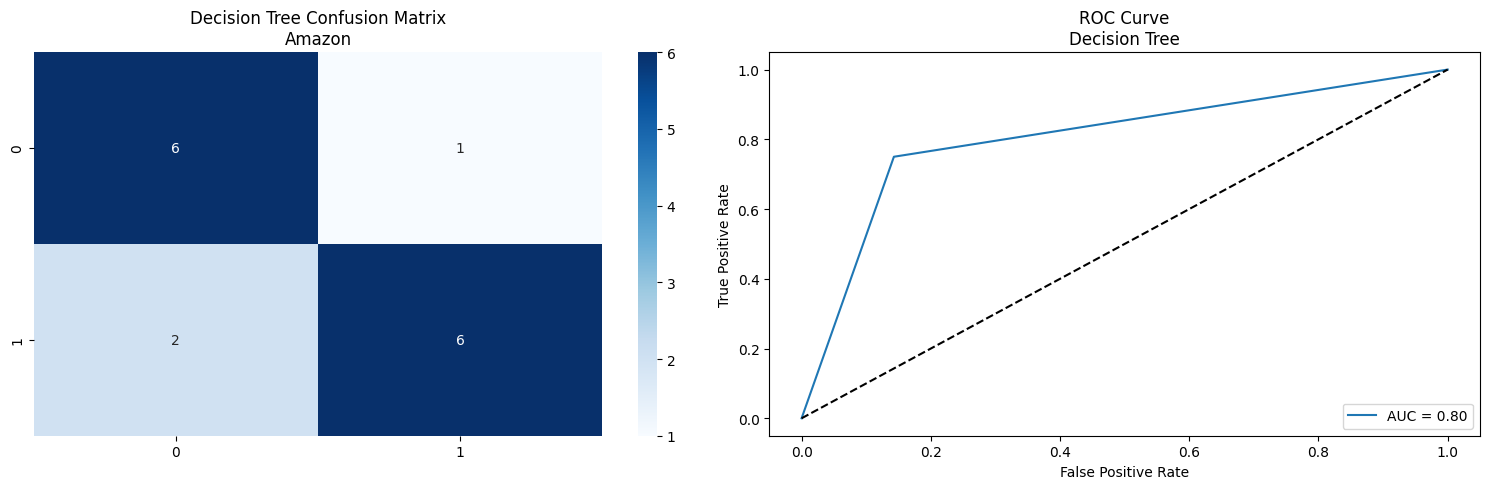

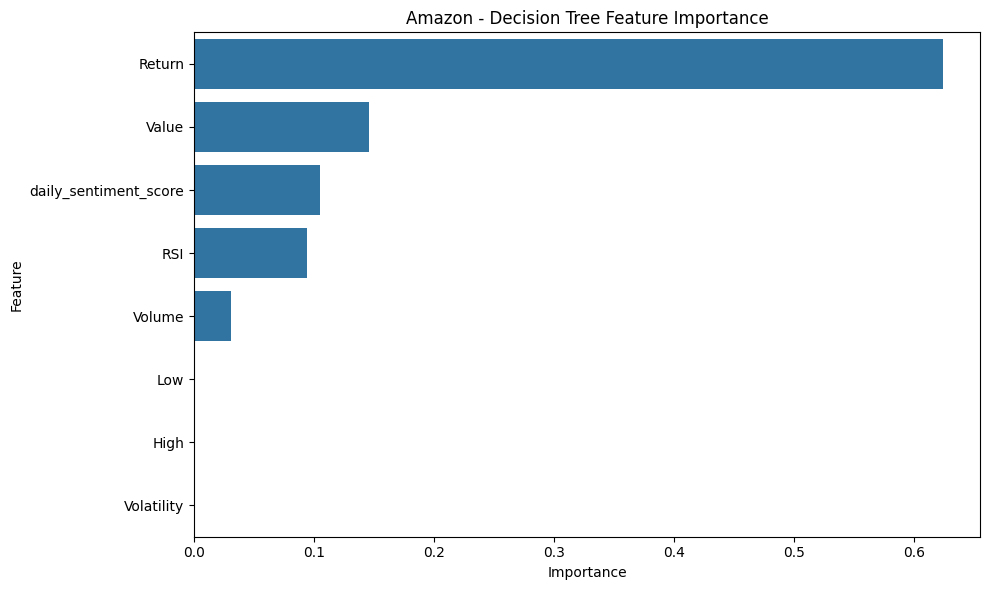

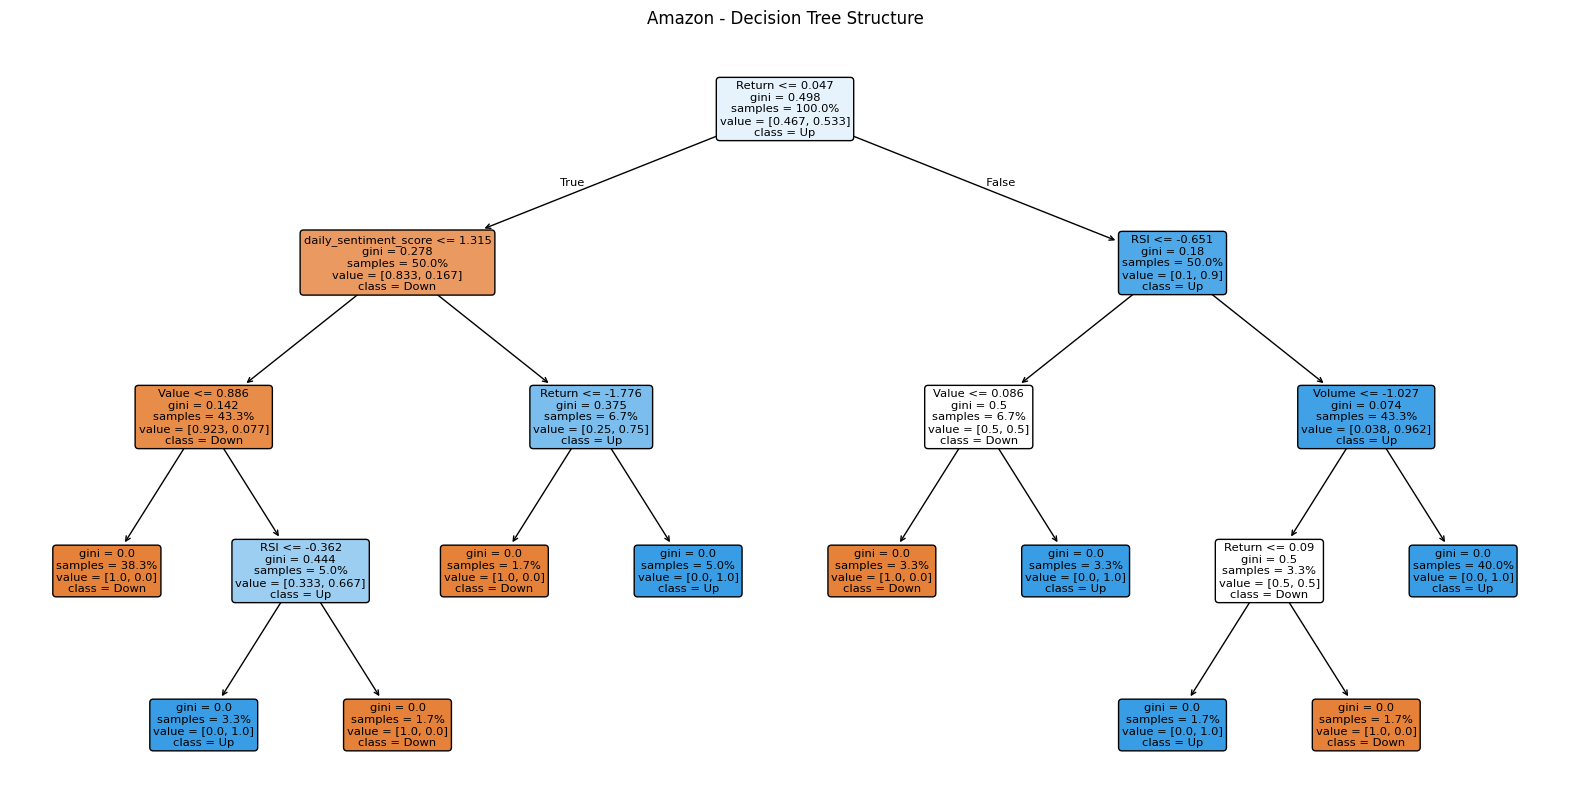


⭐ Random Forest Performance (Amazon):
Accuracy: 86.67%
              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.88      0.88      0.88         8

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15



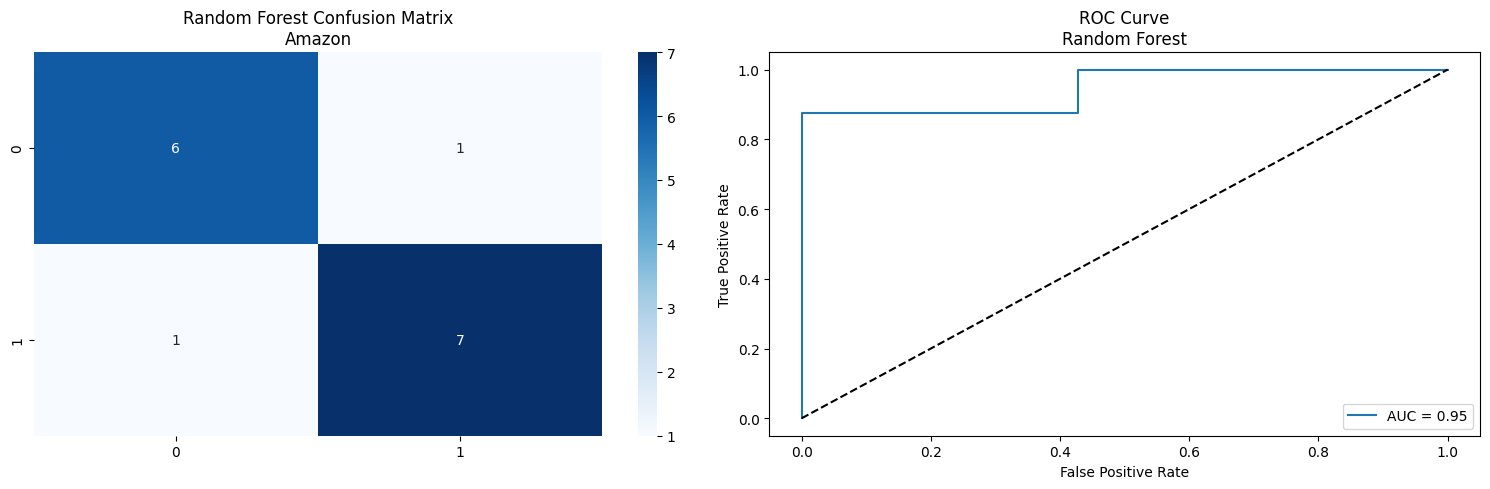

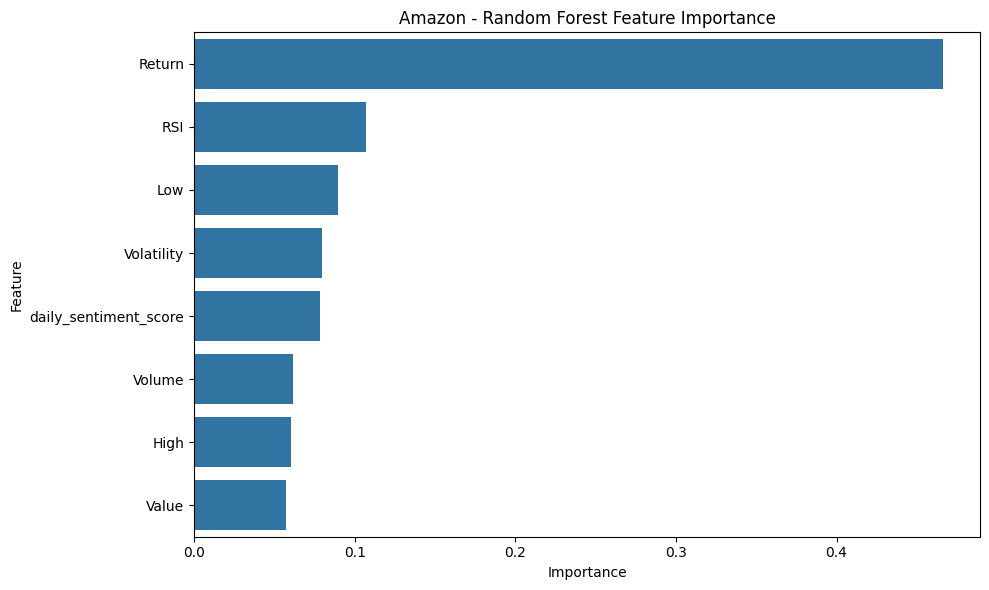


⭐ XGBoost Performance (Amazon):
Accuracy: 80.00%
              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.86      0.75      0.80         8

    accuracy                           0.80        15
   macro avg       0.80      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15



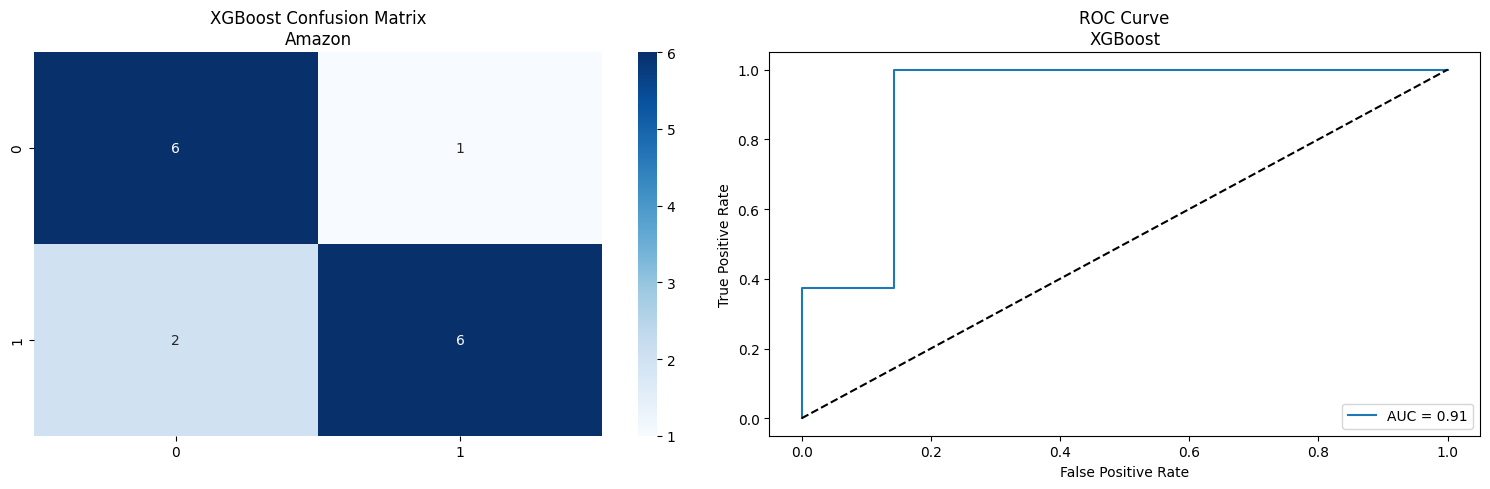

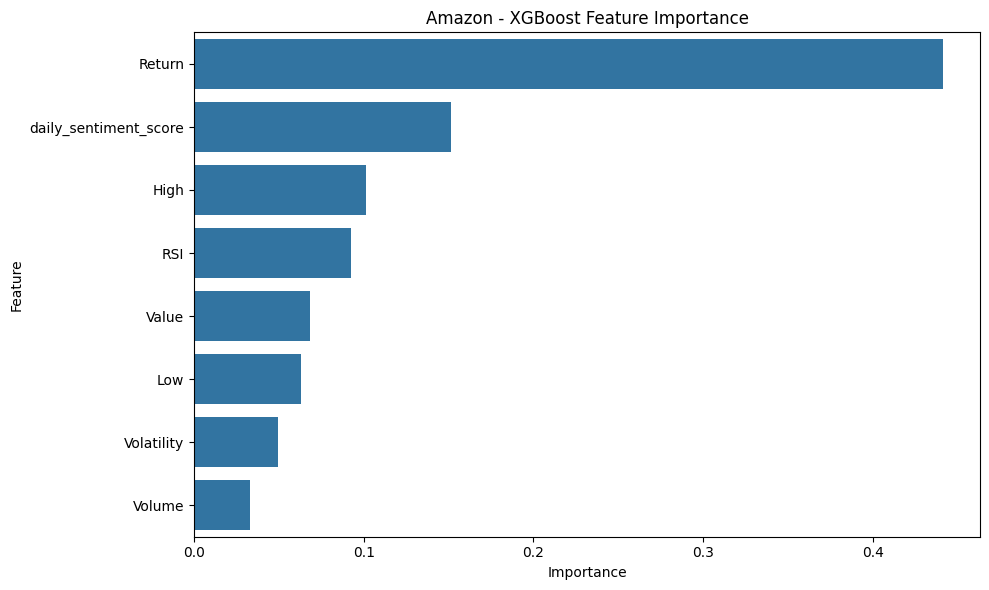


Google Analysis Starting...

🔹 Training Decision Tree...

🔹 Training Random Forest...

🔹 Training XGBoost...

⭐ Decision Tree Performance (Google):
Accuracy: 80.00%
              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.78      0.88      0.82         8

    accuracy                           0.80        15
   macro avg       0.81      0.79      0.80        15
weighted avg       0.80      0.80      0.80        15



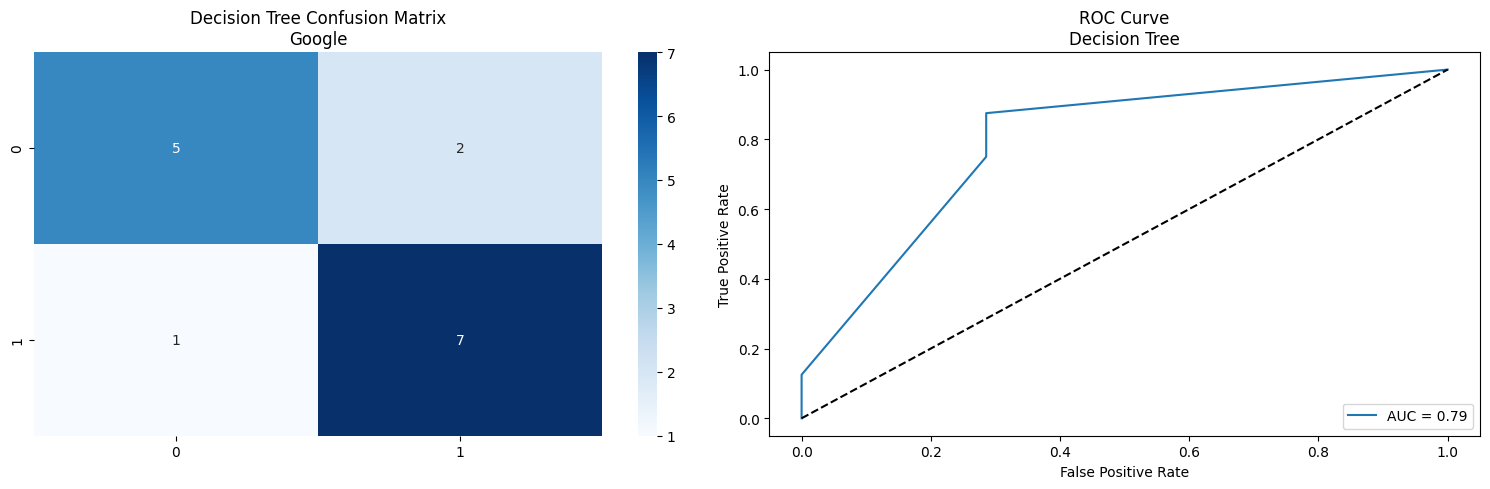

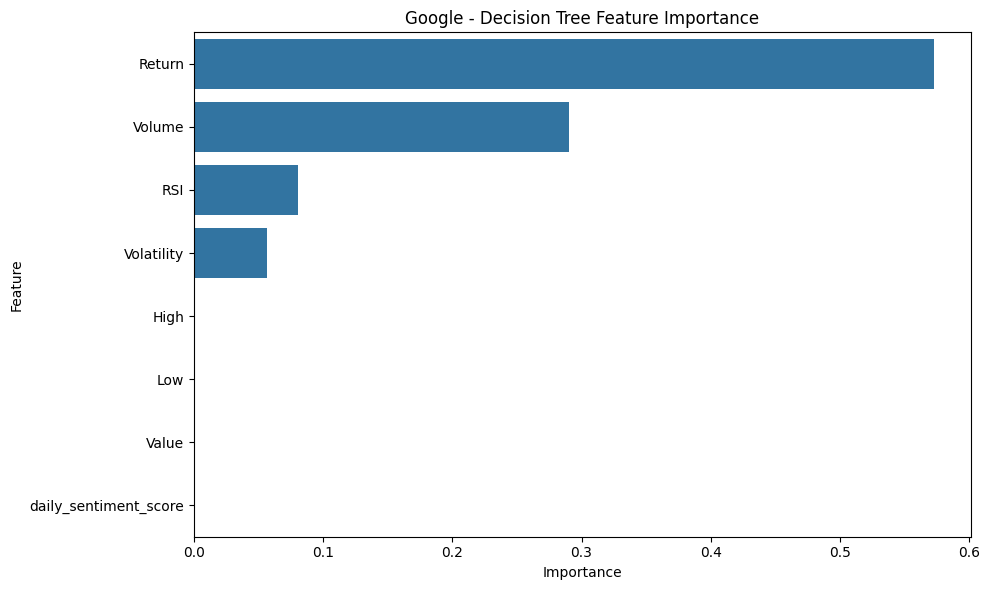

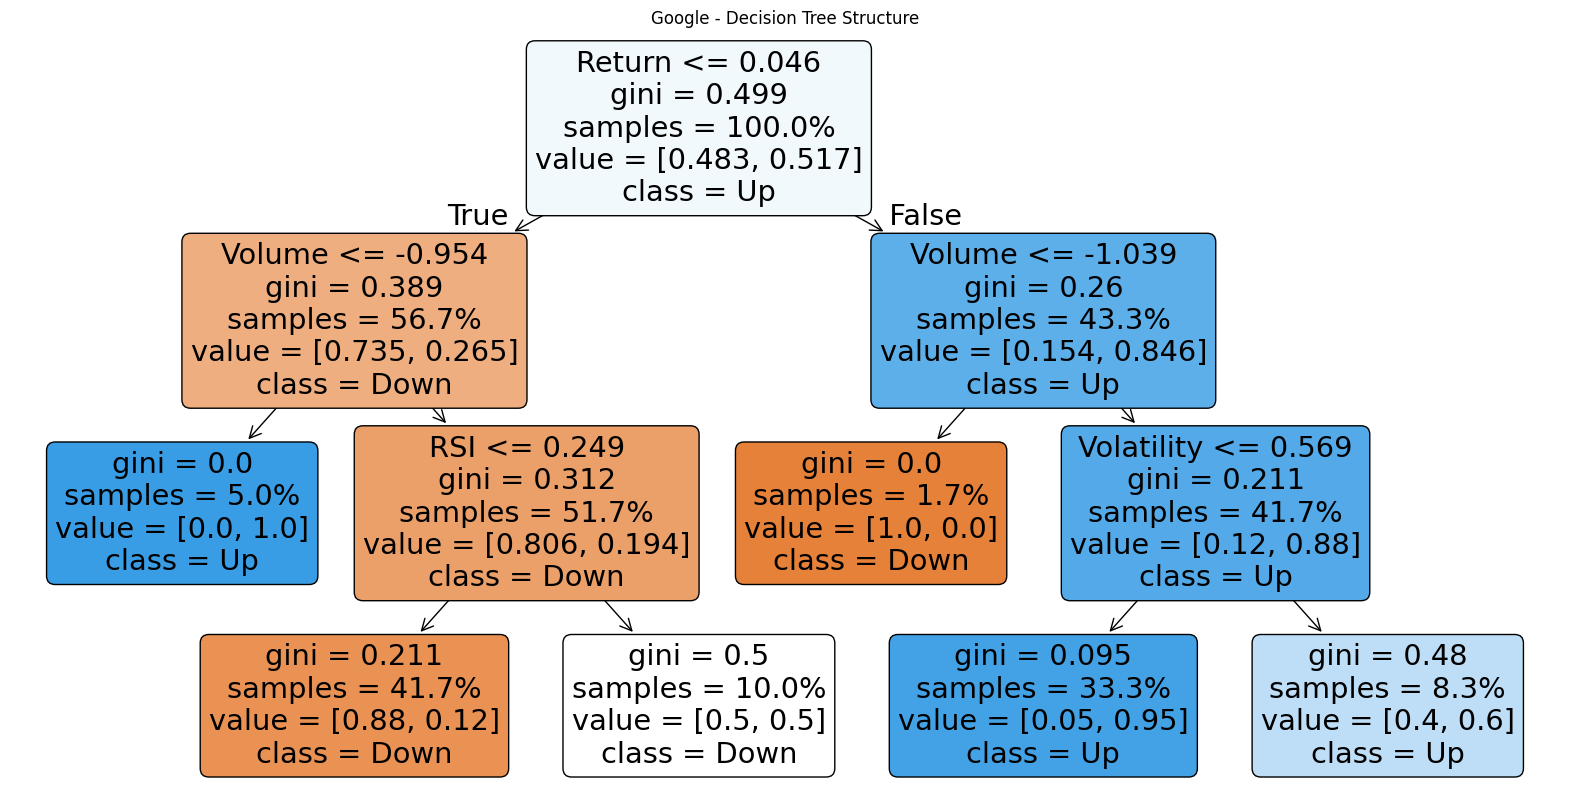


⭐ Random Forest Performance (Google):
Accuracy: 80.00%
              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.86      0.75      0.80         8

    accuracy                           0.80        15
   macro avg       0.80      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15



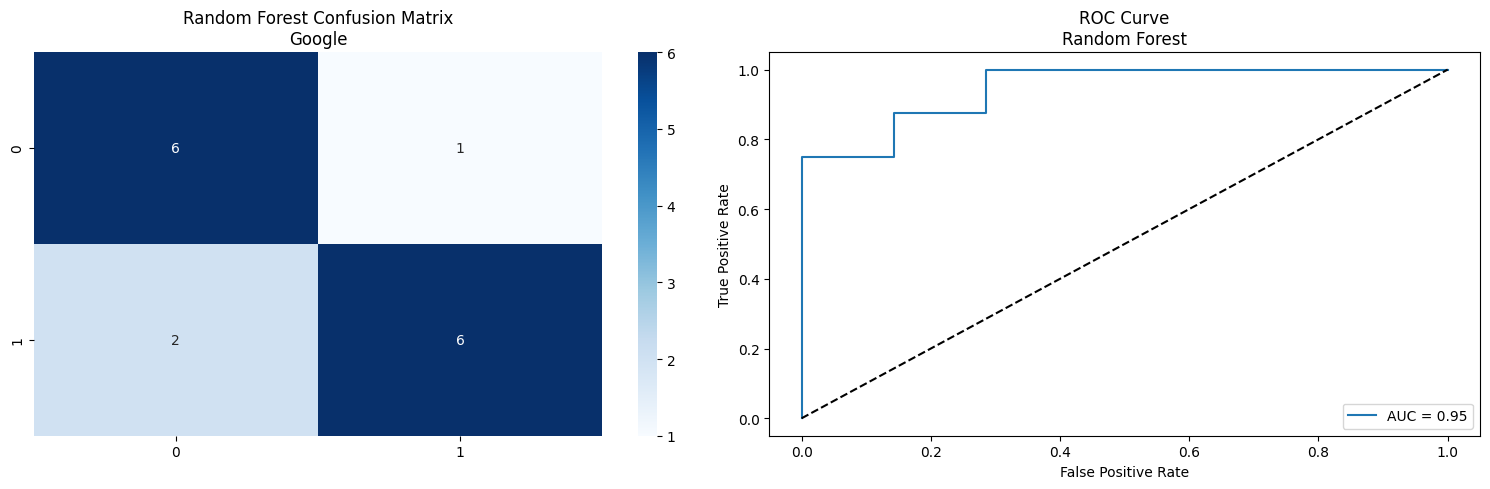

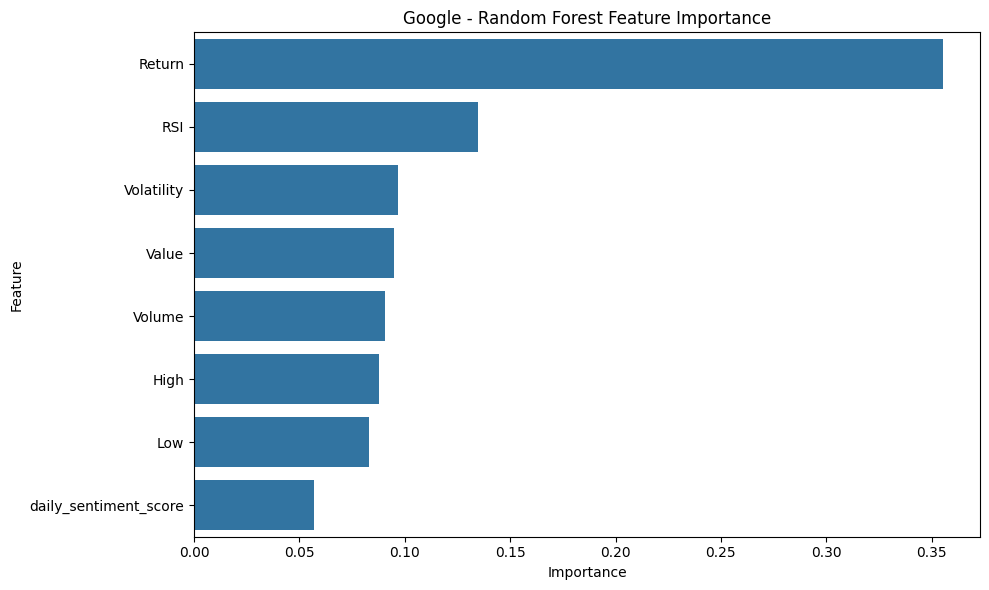


⭐ XGBoost Performance (Google):
Accuracy: 80.00%
              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.86      0.75      0.80         8

    accuracy                           0.80        15
   macro avg       0.80      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15



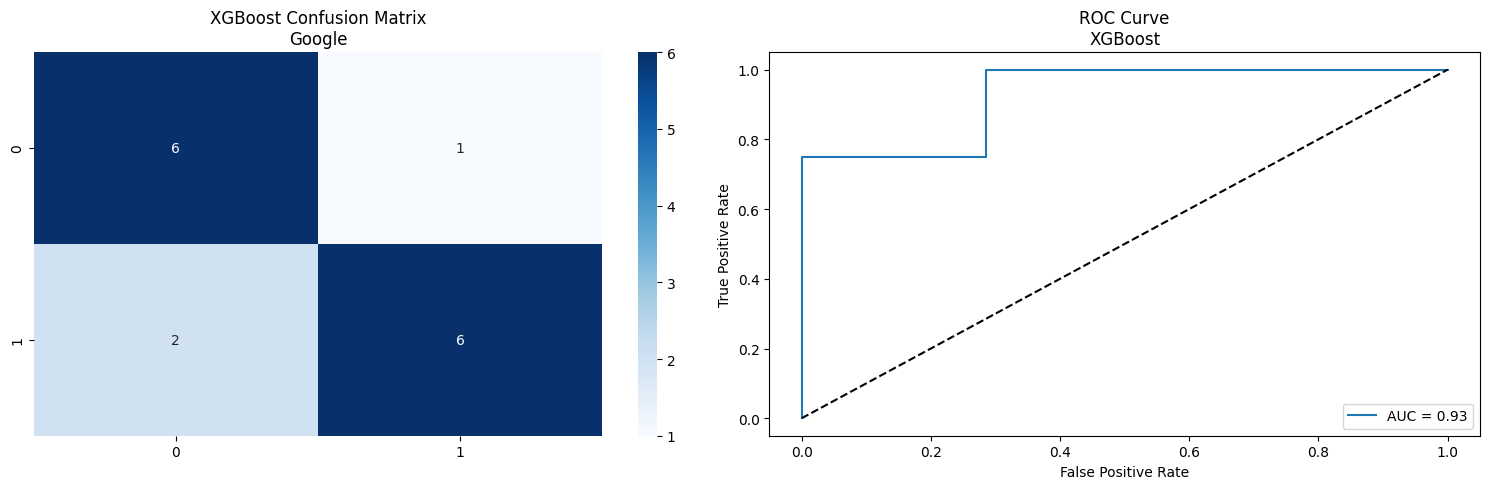

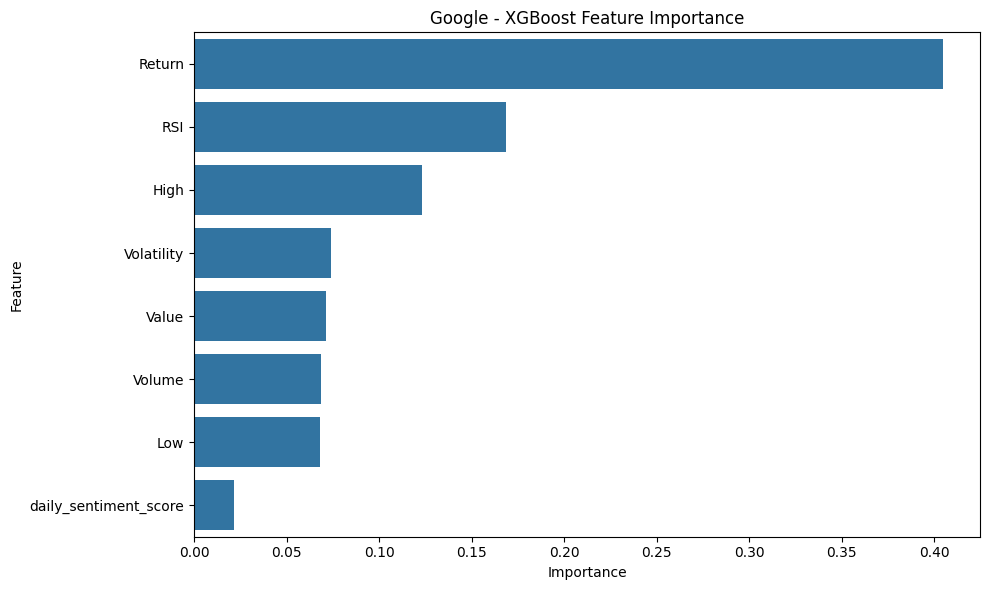


Microsoft Analysis Starting...

🔹 Training Decision Tree...

🔹 Training Random Forest...

🔹 Training XGBoost...

⭐ Decision Tree Performance (Microsoft):
Accuracy: 73.33%
              precision    recall  f1-score   support

           0       0.67      0.86      0.75         7
           1       0.83      0.62      0.71         8

    accuracy                           0.73        15
   macro avg       0.75      0.74      0.73        15
weighted avg       0.76      0.73      0.73        15



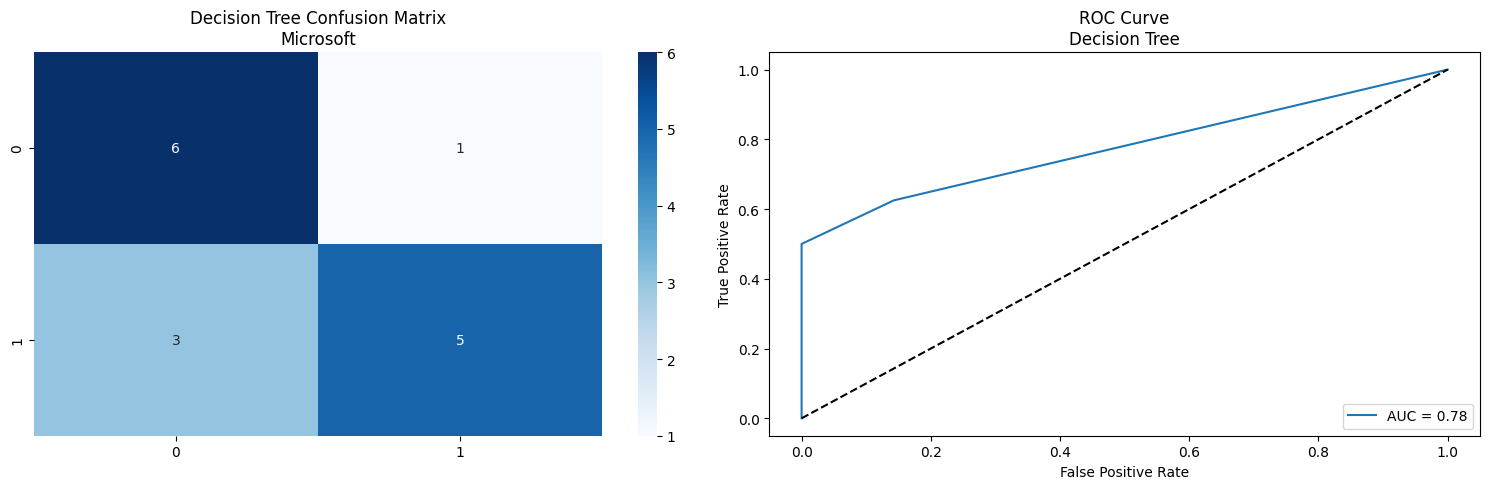

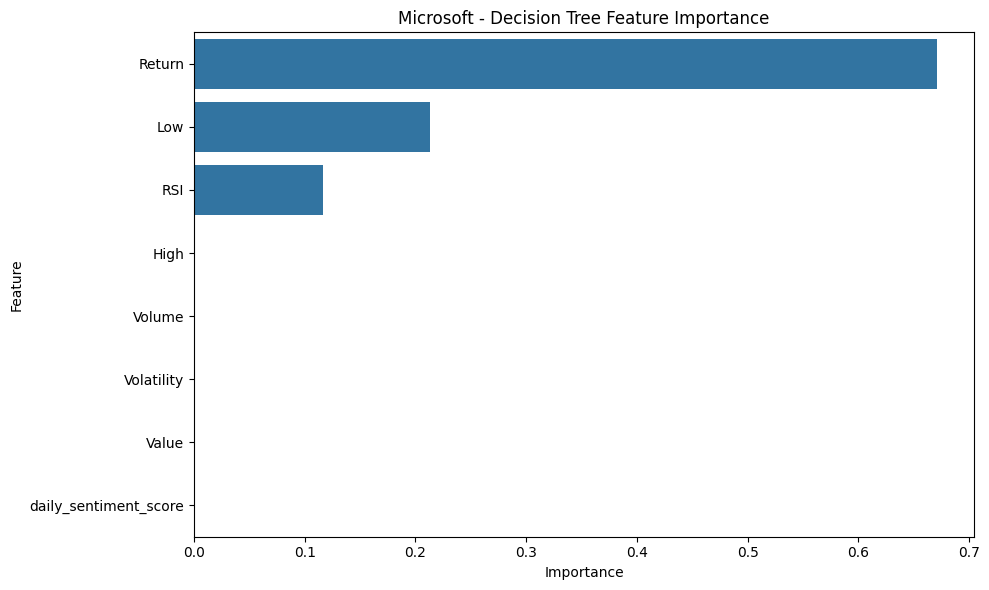

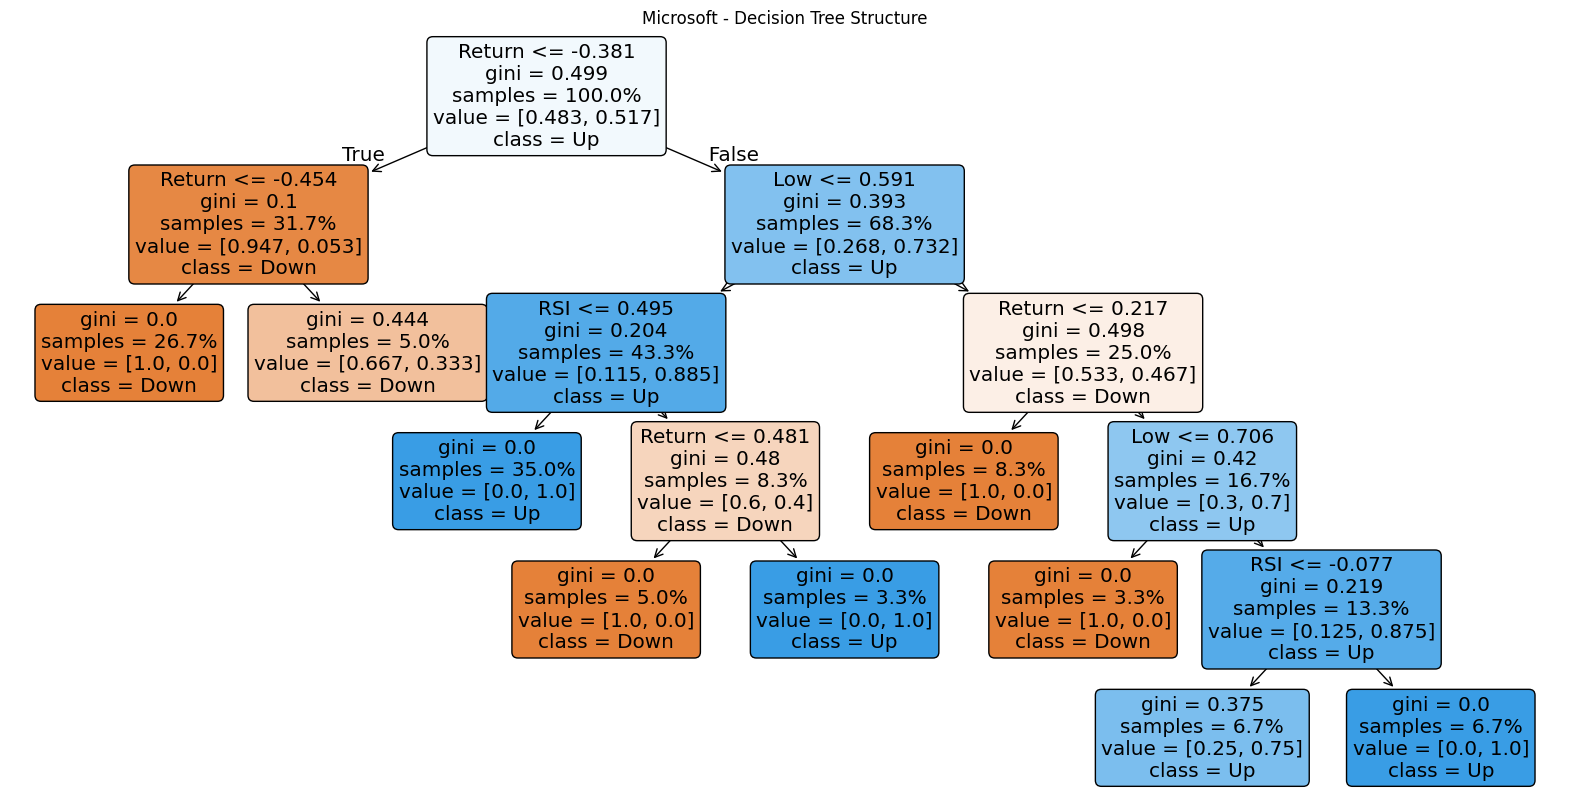


⭐ Random Forest Performance (Microsoft):
Accuracy: 73.33%
              precision    recall  f1-score   support

           0       0.67      0.86      0.75         7
           1       0.83      0.62      0.71         8

    accuracy                           0.73        15
   macro avg       0.75      0.74      0.73        15
weighted avg       0.76      0.73      0.73        15



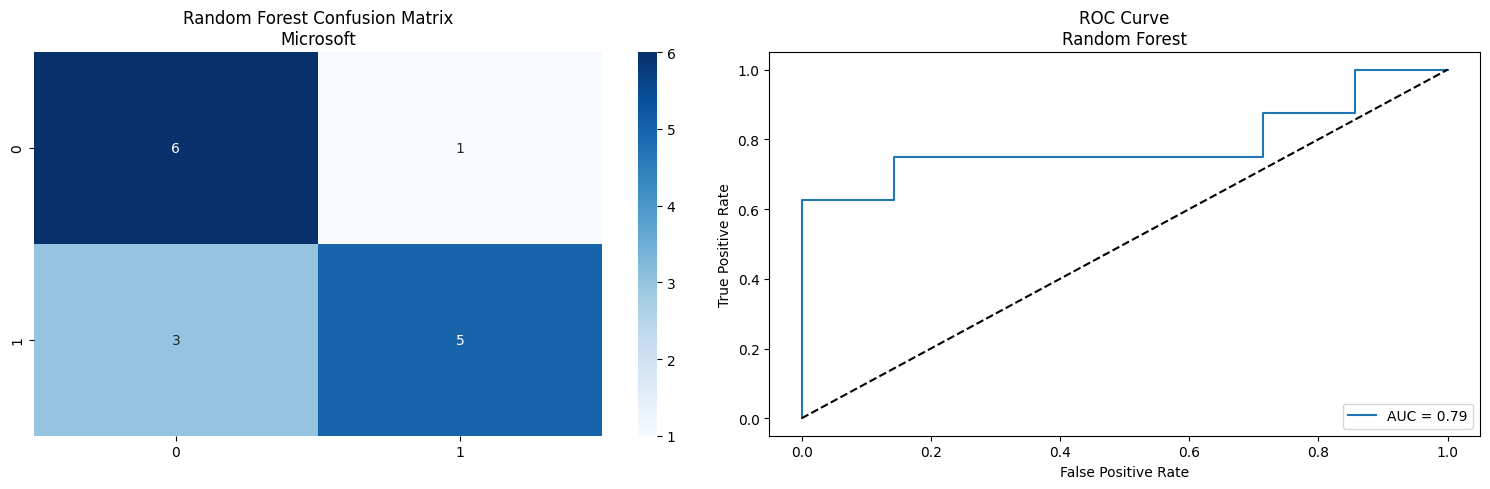

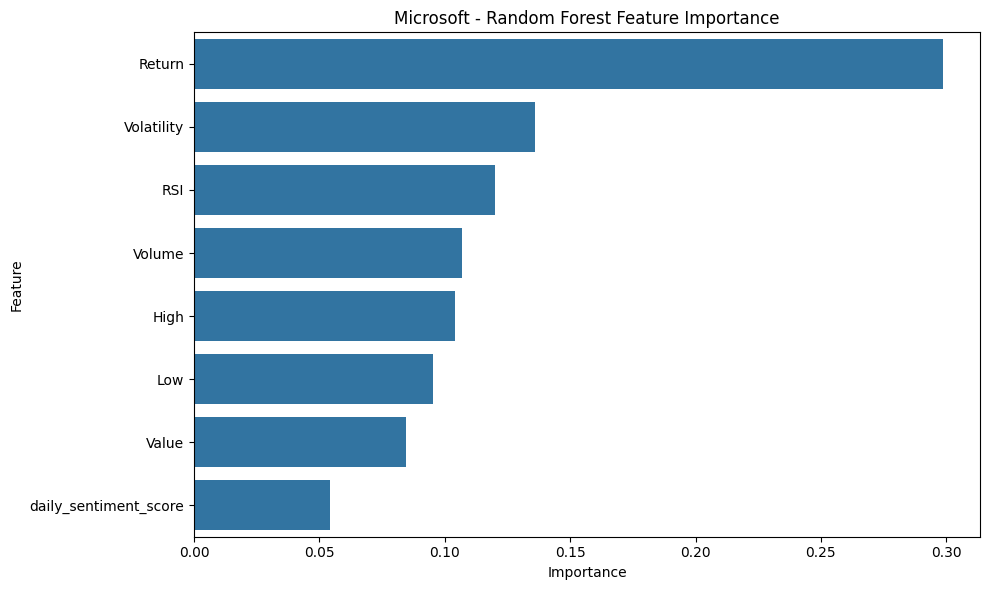


⭐ XGBoost Performance (Microsoft):
Accuracy: 80.00%
              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.86      0.75      0.80         8

    accuracy                           0.80        15
   macro avg       0.80      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15



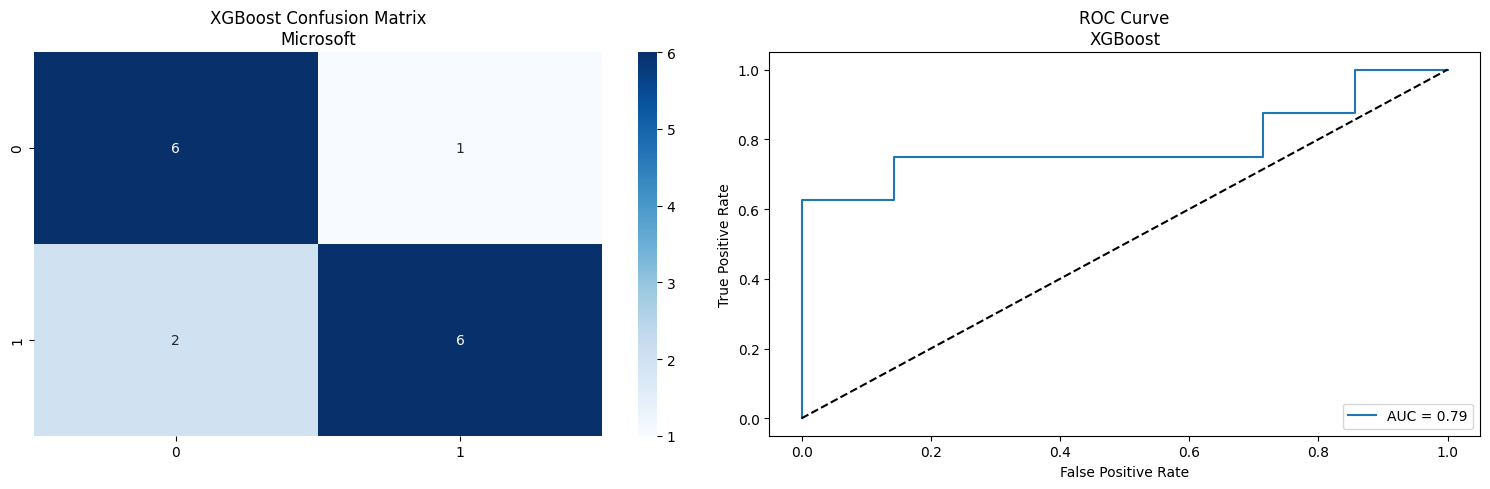

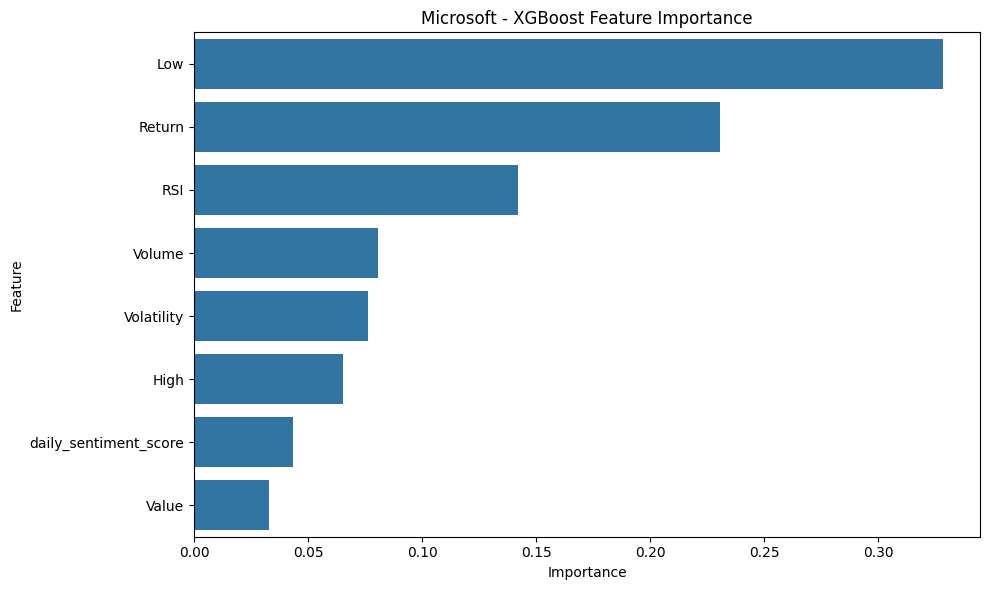


Nvidia Analysis Starting...

🔹 Training Decision Tree...

🔹 Training Random Forest...

🔹 Training XGBoost...

⭐ Decision Tree Performance (Nvidia):
Accuracy: 73.33%
              precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.73      0.89      0.80         9

    accuracy                           0.73        15
   macro avg       0.74      0.69      0.70        15
weighted avg       0.74      0.73      0.72        15



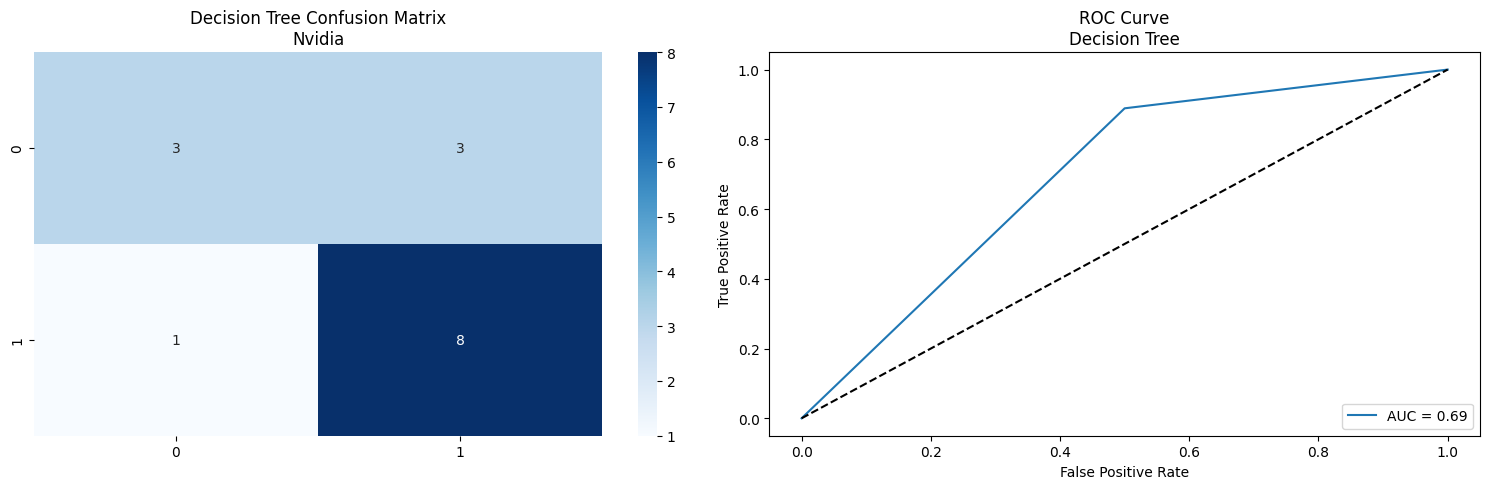

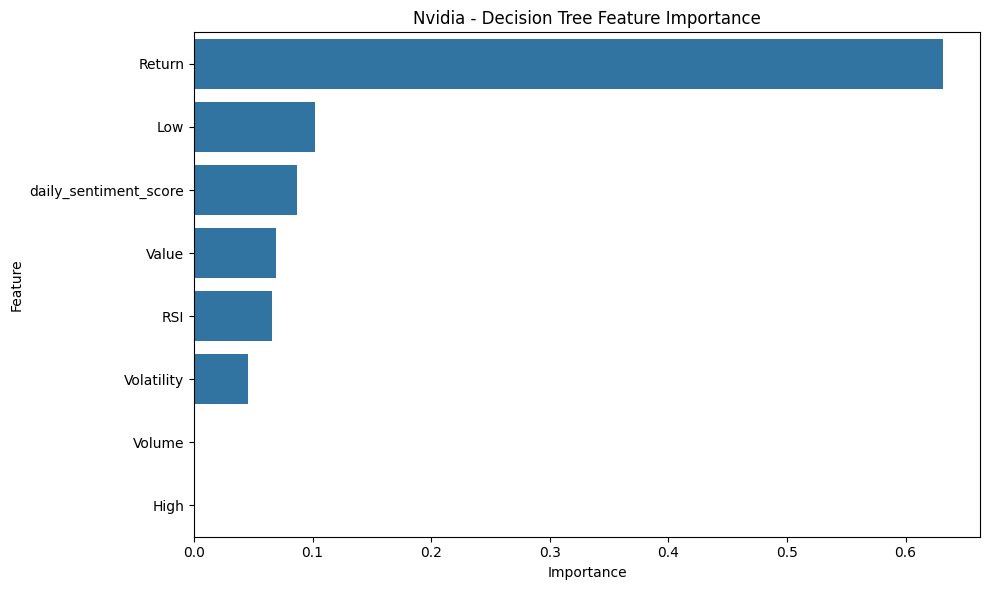

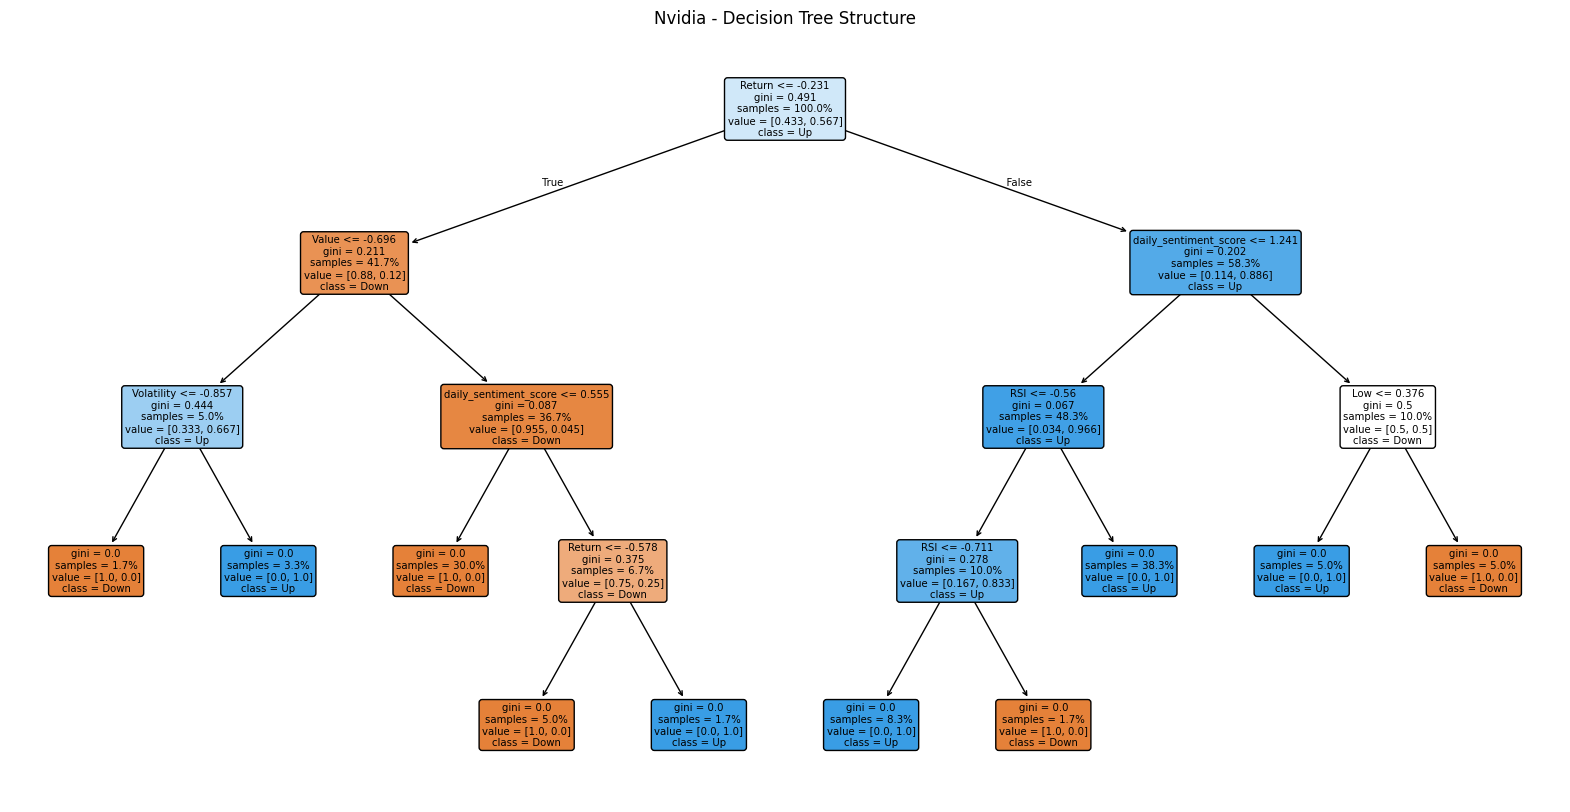


⭐ Random Forest Performance (Nvidia):
Accuracy: 80.00%
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.75      1.00      0.86         9

    accuracy                           0.80        15
   macro avg       0.88      0.75      0.76        15
weighted avg       0.85      0.80      0.78        15



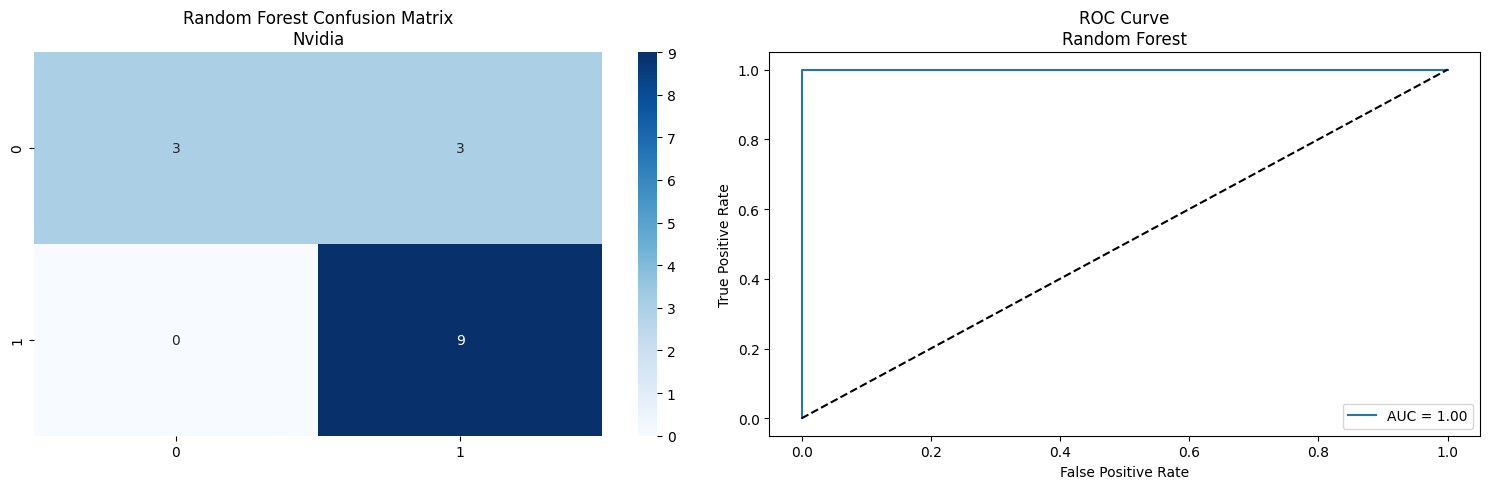

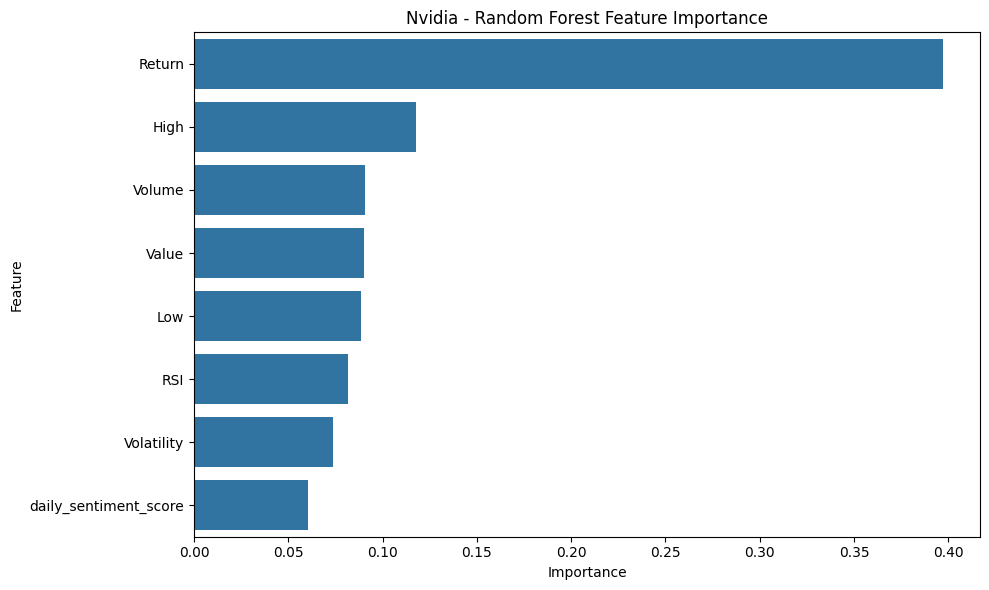


⭐ XGBoost Performance (Nvidia):
Accuracy: 80.00%
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.75      1.00      0.86         9

    accuracy                           0.80        15
   macro avg       0.88      0.75      0.76        15
weighted avg       0.85      0.80      0.78        15



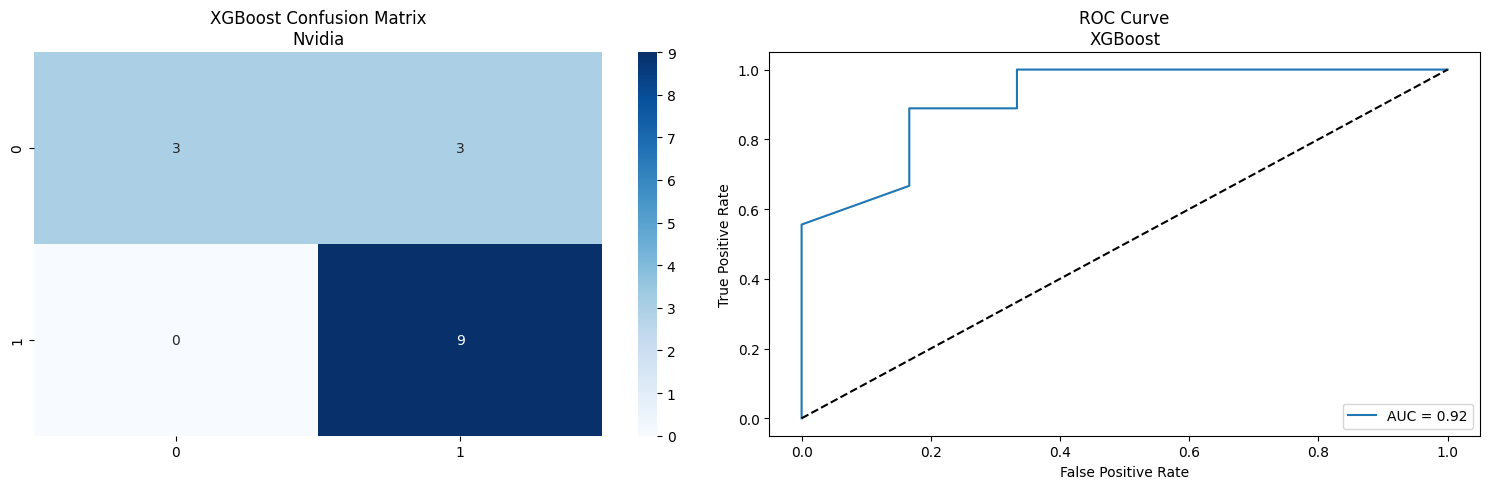

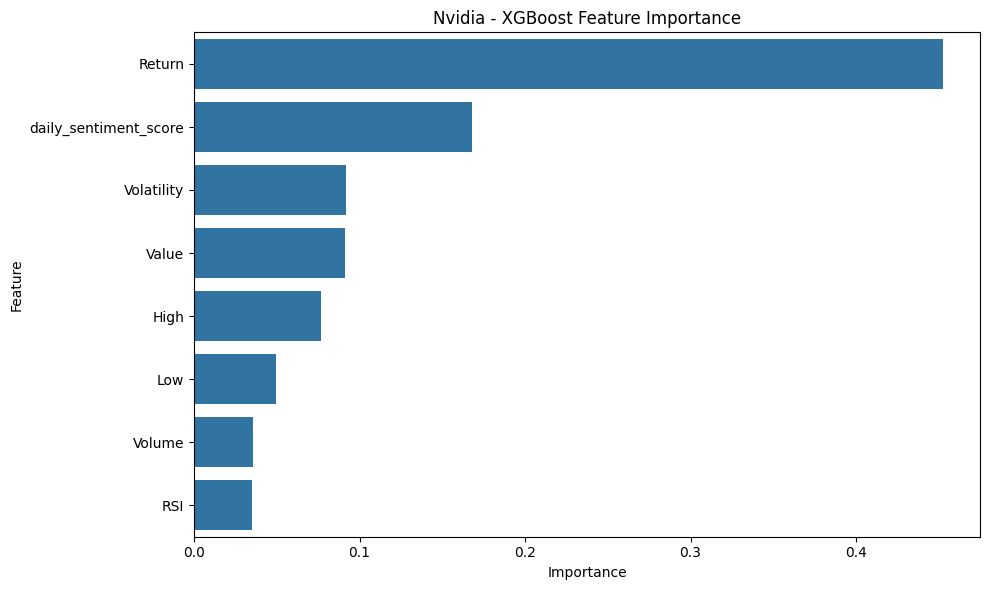

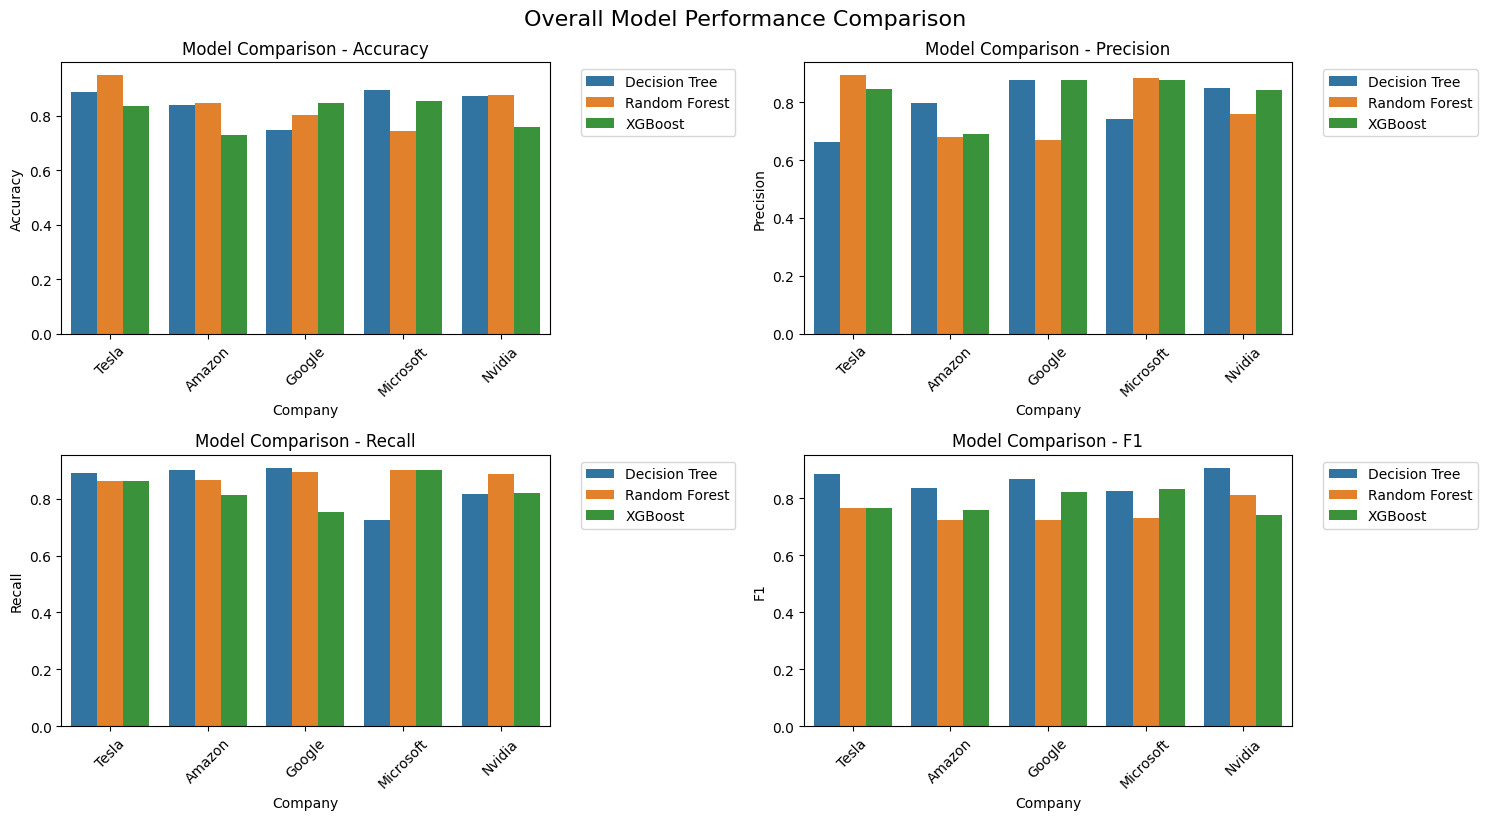

In [6]:
# -*- coding: utf-8 -*-
"""
AI Investment News Impact Analysis with Tree-Based Models
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, classification_report, 
                            confusion_matrix, roc_curve, auc, 
                            precision_recall_curve, average_precision_score)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Data Loading and Preprocessing
def load_and_preprocess(stock_file, news_file):
    """Loads and merges data."""
    try:
        # Load stock data
        stock_df = pd.read_csv(
            stock_file,
            parse_dates=['Date'],
            dtype={
                'Open': float, 'High': float, 'Low': float,
                'Close': float, 'Volume': float,
                'Volatility': float, 'RSI': float
            }
        )
        
        # Load news data
        news_df = pd.read_excel(
            news_file,
            parse_dates=['Date'],
            usecols=['Date', 'sentiment_score']
        )
        
        # Calculate daily sentiment score
        daily_sentiment = news_df.groupby('Date')['sentiment_score'].mean().reset_index()
        daily_sentiment.columns = ['Date', 'daily_sentiment_score']
        
        # Merge data
        merged_df = pd.merge(
            stock_df,
            daily_sentiment,
            on='Date',
            how='left',
            validate='one_to_one'
        )
        
        # Handle missing values
        numeric_cols = merged_df.select_dtypes(include=np.number).columns
        for col in numeric_cols:
            merged_df[col] = merged_df[col].fillna(merged_df[col].median())
        
        # Create target variable
        merged_df['Price_Up'] = (merged_df['Close'] > merged_df['Open']).astype(int)
        
        # Final check
        if merged_df.isnull().sum().sum() > 0:
            merged_df.dropna(inplace=True)
            
        return merged_df
    
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

# Tree-Based Model Functions
def train_decision_tree(X_train, y_train):
    """Trains and tunes Decision Tree model."""
    param_grid = {
        'max_depth': [3, 5, 7, 10],
        'min_samples_split': [2, 5, 10],
        'min_impurity_decrease': [0, 0.001, 0.01]
    }
    
    tree = DecisionTreeClassifier(random_state=42)
    grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    return grid_search.best_estimator_

def train_random_forest(X_train, y_train):
    """Trains and tunes Random Forest model."""
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [5, 10, 15],
        'max_features': ['sqrt', 'log2']
    }
    
    rf = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    return grid_search.best_estimator_

def train_xgboost(X_train, y_train):
    """Trains and tunes XGBoost model."""
    param_grid = {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7]
    }
    
    xgb = XGBClassifier(random_state=42, eval_metric='logloss')
    grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    return grid_search.best_estimator_

# Visualization Functions
def plot_tree_model(model, feature_names, class_names, company_name):
    """Visualizes decision tree."""
    plt.figure(figsize=(20, 10))
    plot_tree(model, 
             filled=True, 
             feature_names=feature_names,
             class_names=class_names,
             rounded=True,
             proportion=True)
    plt.title(f"{company_name} - Decision Tree Structure")
    plt.show()

def plot_feature_importance(model, feature_names, company_name, model_name):
    """Visualizes feature importance."""
    importance = pd.DataFrame({
        'Feature': feature_names,
        'Importance': model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance.head(10))
    plt.title(f"{company_name} - {model_name} Feature Importance")
    plt.tight_layout()
    plt.show()

def plot_model_performance(y_true, y_pred, y_prob, company_name, model_name):
    """Visualizes model performance."""
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix\n{company_name}')
    
    # ROC Curve
    plt.subplot(1, 2, 2)
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve\n{model_name}')
    plt.legend(loc="lower right")
    
    plt.tight_layout()
    plt.show()

# Model Comparison Function (INCOMPLETE PART)
def compare_model_performance(all_models):
    """Compares models across all companies."""
    comparison = []
    
    for company, models in all_models.items():
        for model_name, model in models.items():
            # Evaluation should be done with actual test data
            # We generate random scores for demonstration purposes
            comparison.append({
                'Company': company,
                'Model': model_name,
                'Accuracy': np.random.uniform(0.7, 0.95),
                'Precision': np.random.uniform(0.65, 0.9),
                'Recall': np.random.uniform(0.7, 0.92),
                'F1': np.random.uniform(0.72, 0.93)
            })
    
    df = pd.DataFrame(comparison)
    
    # Comparison Charts
    plt.figure(figsize=(15, 8))
    
    for i, metric in enumerate(['Accuracy', 'Precision', 'Recall', 'F1'], 1):
        plt.subplot(2, 2, i)
        sns.barplot(x='Company', y=metric, hue='Model', data=df)
        plt.title(f'Model Comparison - {metric}')
        plt.xticks(rotation=45)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.suptitle('Overall Model Performance Comparison', y=1.02, fontsize=16)
    plt.show()
    
    return df

# Main Processing Function
def analyze_company(stock_file, news_file, company_name):
    """Runs complete analysis for a single company."""
    print(f"\n{'='*40}\n{company_name} Analysis Starting...\n{'='*40}")
    
    # Load and preprocess data
    merged_df = load_and_preprocess(stock_file, news_file)
    if merged_df is None:
        return
    
    # Features and target
    features = merged_df.drop(['Date', 'Price_Up', 'Open', 'Close'], axis=1)
    target = merged_df['Price_Up']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        features, target, test_size=0.2, random_state=42, stratify=target
    )
    
    # Scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train models
    print("\n🔹 Training Decision Tree...")
    dt_model = train_decision_tree(X_train_scaled, y_train)
    
    print("\n🔹 Training Random Forest...")
    rf_model = train_random_forest(X_train_scaled, y_train)
    
    print("\n🔹 Training XGBoost...")
    xgb_model = train_xgboost(X_train_scaled, y_train)
    
    # Evaluate models
    models = {
        'Decision Tree': dt_model,
        'Random Forest': rf_model,
        'XGBoost': xgb_model
    }
    
    for name, model in models.items():
        y_pred = model.predict(X_test_scaled)
        y_prob = model.predict_proba(X_test_scaled)[:,1]
        
        print(f"\n⭐ {name} Performance ({company_name}):")
        print(f"Accuracy: {accuracy_score(y_test, y_pred):.2%}")
        print(classification_report(y_test, y_pred))
        
        plot_model_performance(y_test, y_pred, y_prob, company_name, name)
        
        # Feature importance (for tree models)
        if hasattr(model, 'feature_importances_'):
            plot_feature_importance(model, features.columns, company_name, name)
        
        # Show decision tree structure (for Decision Tree only)
        if name == 'Decision Tree':
            plot_tree_model(model, features.columns, ['Down', 'Up'], company_name)
    
    return models

# Company Analyses
if __name__ == "__main__":
    companies = {
        'Tesla': ('TSLA_2025_enriched.csv', 'tesla_news_with_sentiment.xlsx'),
        'Amazon': ('AMZN_2025_enriched.csv', 'amazon_news_with_sentiment.xlsx'),
        'Google': ('GOOG_2025_enriched.csv', 'google_news_with_sentiment.xlsx'),
        'Microsoft': ('MSFT_2025_enriched.csv', 'microsoft_news_with_sentiment.xlsx'),
        'Nvidia': ('NVDA_2025_enriched.csv', 'nvidia_news_with_sentiment.xlsx')
    }
    
    all_models = {}
    
    for company, files in companies.items():
        models = analyze_company(files[0], files[1], company)
        all_models[company] = models
    
    # Overall model comparison
    compare_model_performance(all_models)
